# Measuring and Visualizing Sound Event Density of GerDraCor 

In [1]:
#imports and installations needed

#!pip install -U kaleido
import os
import xml.etree.ElementTree as ET
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import string
import numpy as np

In [2]:
#in case that plotly only shows empty plots
import plotly
print(plotly.__version__)
import plotly.io as pio
pio.renderers.default = 'notebook'  # for classic Jupyter Notebook

6.2.0


In [194]:
df1 = pd.read_csv('/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/gerdracor-metadata.csv')
df1
count = df1[(df1['yearNormalized'] >= 1750) & (df1['yearNormalized'] <= 1950)]['name'].nunique()
print(count)

679


In [129]:
#Read in and merge the csv files metadata and genre information to one csv file

# Load the CSVs
df1 = pd.read_csv('/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/gerdracor-metadata.csv')
df2 = pd.read_csv('/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/genres.csv')

df1.rename(columns={'name': 'filename'}, inplace=True)
df2['filename'] = df2['filename'].str.replace('.xml', '', regex=False)

#print(df2.columns)
#df1.head()

# Merge on 'name'
merged_df = pd.merge(df1, df2, on='filename', how='inner')

# Show result
merged_df.head()

,filename,id,wikidataId,firstAuthor,numOfCoAuthors,title,subtitle,normalizedGenre,digitalSource,originalSourcePublisher,...,wikipediaLinkCount,numOfActs,wordCountText,wordCountSp,wordCountStage,numOfP,numOfL,genre_selfascription,genre,add_genre
0,achat-ein-april-scherz,ger000637,Q121463020,Achat,0,Ein April-Scherz,Original-Lustspiel in einem Akt,Comedy,https://books.google.com/books?id=qHNIAQAAMAAJ...,Vereins-Buchhandlung,...,0,0,6888,6681,411,518,0,Original-Lustspiel in einem Akt,Lustspiel,comedy
1,adolph-am-ersten-mai,ger000569,Q111795417,Adolph,0,Am ersten Mai,Eine Tragikomödie der Arbeit aus Friedenstagen,NaN,https://www.projekt-gutenberg.org/adolph/am1ma...,NaN,...,0,0,7696,7438,998,244,2,Eine Tragikomödie der Arbeit aus Friedenstagen,Tragikomödie,NaN
2,alberti-brot,ger000171,Q51370104,Alberti,0,Brot!,Ein soziales Schauspiel in fünf Akten,NaN,http://www.textgridrep.org/textgrid:jkjf.0,NaN,...,0,5,28744,26008,1771,797,12,Ein soziales Schauspiel in fünf Akten,NaN,NaN
3,alberti-im-suff,ger000041,Q51370930,Alberti,0,Im Suff,Naturalistische Spital-Katastrophe in zwei Vor...,NaN,http://www.textgridrep.org/textgrid:jkjb.0,NaN,...,0,0,12497,11454,4016,365,191,Naturalistische Spital-Katastrophe in zwei Vor...,NaN,NaN
4,alexander-die-verpfaendung,ger000630,Q120646668,Alexander,0,Die Verpfändung,Ein Schauspiel in einem Aufzuge,NaN,https://books.google.com/books?id=3GxUAAAAcAAJ...,Neumann,...,0,0,6667,6295,740,197,0,Ein Schauspiel in einem Aufzuge,NaN,NaN


In [167]:
#give me the count of not NaN in the column "normalizedGenre"
#give me the count of not NaN in the column "add_genre"
#merge the columns "add_genre" and "normalizedGenre" to the new column "normalizedGenre_update"
#give me the new count of not Nan in the column "normalizedGenre_update"

# 1) Count of not NaN in "normalizedGenre"
count_normalized_genre = merged_df["normalizedGenre"].notna().sum()
print(f"Non-NaN in 'normalizedGenre': {count_normalized_genre}")

# 2) Count of not NaN in "add_genre"
count_add_genre = merged_df["add_genre"].notna().sum()
print(f"Non-NaN in 'add_genre': {count_add_genre}")

# 3) Merge columns "add_genre" and "normalizedGenre"
#    Prefer 'normalizedGenre' if available, otherwise take 'add_genre'
merged_df["normalizedGenre_update"] = merged_df["normalizedGenre"].combine_first(merged_df["add_genre"])

# 4) Count of not NaN in "normalizedGenre_update"
count_normalized_genre_update = merged_df["normalizedGenre_update"].notna().sum()
print(f"Non-NaN in 'normalizedGenre_update': {count_normalized_genre_update}")

# 5) Show head of the updated dataframe
merged_df.head()


Non-NaN in 'normalizedGenre': 391
Non-NaN in 'add_genre': 310
Non-NaN in 'normalizedGenre_update': 391


,filename,id,wikidataId,firstAuthor,numOfCoAuthors,title,subtitle,normalizedGenre,digitalSource,originalSourcePublisher,...,numOfActs,wordCountText,wordCountSp,wordCountStage,numOfP,numOfL,genre_selfascription,genre,add_genre,normalizedGenre_update
0,achat-ein-april-scherz,ger000637,Q121463020,Achat,0,Ein April-Scherz,Original-Lustspiel in einem Akt,Comedy,https://books.google.com/books?id=qHNIAQAAMAAJ...,Vereins-Buchhandlung,...,0,6888,6681,411,518,0,Original-Lustspiel in einem Akt,Lustspiel,comedy,Comedy
1,adolph-am-ersten-mai,ger000569,Q111795417,Adolph,0,Am ersten Mai,Eine Tragikomödie der Arbeit aus Friedenstagen,NaN,https://www.projekt-gutenberg.org/adolph/am1ma...,NaN,...,0,7696,7438,998,244,2,Eine Tragikomödie der Arbeit aus Friedenstagen,Tragikomödie,NaN,NaN
2,alberti-brot,ger000171,Q51370104,Alberti,0,Brot!,Ein soziales Schauspiel in fünf Akten,NaN,http://www.textgridrep.org/textgrid:jkjf.0,NaN,...,5,28744,26008,1771,797,12,Ein soziales Schauspiel in fünf Akten,NaN,NaN,NaN
3,alberti-im-suff,ger000041,Q51370930,Alberti,0,Im Suff,Naturalistische Spital-Katastrophe in zwei Vor...,NaN,http://www.textgridrep.org/textgrid:jkjb.0,NaN,...,0,12497,11454,4016,365,191,Naturalistische Spital-Katastrophe in zwei Vor...,NaN,NaN,NaN
4,alexander-die-verpfaendung,ger000630,Q120646668,Alexander,0,Die Verpfändung,Ein Schauspiel in einem Aufzuge,NaN,https://books.google.com/books?id=3GxUAAAAcAAJ...,Neumann,...,0,6667,6295,740,197,0,Ein Schauspiel in einem Aufzuge,NaN,NaN,NaN


In [168]:
# Filter rows where add_genre is not NaN AND normalizedGenre is NaN
'''
missing_normalized_from_add = merged_df[
    merged_df["add_genre"].notna() & merged_df["normalizedGenre"].isna()
]

print(f"Number of such rows: {len(missing_normalized_from_add)}")
missing_normalized_from_add[["filename", "add_genre", "normalizedGenre"]]
'''

Number of such rows: 0


,filename,add_genre,normalizedGenre


## Sound Event Density 
Given is a sound event annotated XML file provided as a pandas data frame.
In the following, I count the number of words in the XML files excluding the XML elements. 
I further extract the XML content which are the sound event spans, separately for ambient and character sound events, and save them in two separate columns together with their assigned loudness level as dictionaries, having the spans as keys and the loudness level as values. 
Then, I tokenize the dictionary keys, save the tokenized copy to a further data frame column, and calculate the average size of a sound event in words. 

In [169]:
#read in the folder with the annotated xml files 
folder_path = '/Users/sguhr/Desktop/20250729_prediction_output/postprocessed2/20250806_sound-predicted_GerDraCor_plays'

In [170]:
# extract the sound events, cluster them, analyze their frequency per class, and give information on average and standard deviation of all sound events and filtered by sound class (ambient or character sound)

import os
import xml.etree.ElementTree as ET
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import string
import numpy as np

def extract_sound_spans(xml_content):
    sound_spans = {'character_sound': {}, 'ambient_sound': {}}
    root = ET.fromstring(xml_content)

    for elem in root.iter():
        tag = elem.tag.split('}')[-1]  # handles namespaced and non-namespaced tags
        if tag in ('character_sound', 'ambient_sound'):
            sound_text = elem.text.strip() if elem.text else ""
            tokenized_text = word_tokenize(sound_text, language='english')
            filtered_tokens = [token for token in tokenized_text if token not in string.punctuation]
            sound_spans[tag][tuple(filtered_tokens)] = None
    return sound_spans

def calculate_word_token_length(text):
    text_without_tags = re.sub(r'<[^>]+>', '', text)
    tokens = word_tokenize(text_without_tags, language='english')
    filtered_tokens = [token for token in tokens if token not in string.punctuation]
    return len(filtered_tokens)

def calculate_std_token_count(sound_spans):
    token_counts = [len(k) for k in sound_spans.keys()]
    return round(np.std(token_counts), 2) if token_counts else 0

def process_xml_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        xml_content = file.read()

    sound_spans = extract_sound_spans(xml_content)
    character_sound_spans = sound_spans['character_sound']
    ambient_sound_spans = sound_spans['ambient_sound']
    word_token_length = calculate_word_token_length(xml_content)

    # Average token counts
    character_avg_token_count_without_nan = round(
        sum(len(k) for k in character_sound_spans.keys()) / len(character_sound_spans)
        if character_sound_spans else 0, 2
    )
    ambient_avg_token_count_without_nan = round(
        sum(len(k) for k in ambient_sound_spans.keys()) / len(ambient_sound_spans)
        if ambient_sound_spans else 0, 2
    )
    total_avg_token_count_without_nan = round(
        (
            sum(len(k) for k in character_sound_spans.keys()) +
            sum(len(k) for k in ambient_sound_spans.keys())
        ) /
        (
            len(character_sound_spans) + len(ambient_sound_spans)
            if (character_sound_spans or ambient_sound_spans) else 1
        ), 2
    )

    # Token count std
    character_token_count_std_without_nan = calculate_std_token_count(character_sound_spans)
    ambient_token_count_std_without_nan = calculate_std_token_count(ambient_sound_spans)
    combined_token_counts = [len(k) for k in list(character_sound_spans.keys()) + list(ambient_sound_spans.keys())]
    total_token_count_std_without_nan = round(np.std(combined_token_counts), 2) if combined_token_counts else 0

    # t_se average
    t_se_aver_without_nan = round(word_token_length / total_avg_token_count_without_nan, 2) if total_avg_token_count_without_nan != 0 else 0

    # SE count (equal to number of sound spans)
    character_se_count_without_nan = len(character_sound_spans)
    ambient_se_count_without_nan = len(ambient_sound_spans)
    total_se_count_without_nan = character_se_count_without_nan + ambient_se_count_without_nan

    return {
        'character_sound-loudness_dictionary': character_sound_spans,
        'ambient_sound-loudness_dictionary': ambient_sound_spans,
        'character_avg_token_count_without_nan': character_avg_token_count_without_nan,
        'ambient_avg_token_count_without_nan': ambient_avg_token_count_without_nan,
        'total_avg_token_count_without_nan': total_avg_token_count_without_nan,
        't_se_aver_without_nan': t_se_aver_without_nan,
        'character_se_count_without_nan': character_se_count_without_nan,
        'ambient_se_count_without_nan': ambient_se_count_without_nan,
        'total_se_count_without_nan': total_se_count_without_nan,
        'character_token_count_std_without_nan': character_token_count_std_without_nan,
        'ambient_token_count_std_without_nan': ambient_token_count_std_without_nan,
        'total_token_count_std_without_nan': total_token_count_std_without_nan
    }

def process_folder(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.xml'):
            filepath = os.path.join(folder_path, filename)
            result = process_xml_file(filepath)
            result['filename'] = filename
            data.append(result)
    return pd.DataFrame(data)




In [171]:
# Employ the defined functions on the folder with the annotated xml files
df_new = process_folder('/Users/sguhr/Desktop/20250729_prediction_output/postprocessed2/20250806_sound-predicted_GerDraCor_plays')



In [172]:
#show the new dataframe with the analyzed annotation data
df_new

,character_sound-loudness_dictionary,ambient_sound-loudness_dictionary,character_avg_token_count_without_nan,ambient_avg_token_count_without_nan,total_avg_token_count_without_nan,t_se_aver_without_nan,character_se_count_without_nan,ambient_se_count_without_nan,total_se_count_without_nan,character_token_count_std_without_nan,ambient_token_count_std_without_nan,total_token_count_std_without_nan,filename
0,"{('List',): None, ('wie', 'ich', 'dir', 'gesag...","{('Die', 'Scene', 'spielt'): None, ('schreyt',...",2.90,2.67,2.89,2919.72,105,6,111,1.80,1.89,1.81,kaffka-der-transport.xml
1,"{('ich', 'sage', 'Dir'): None, ('auf', 'den', ...","{('Es', 'klopft', 'rechts'): None, ('und', 'kr...",3.25,2.78,3.10,450.65,20,9,29,1.26,1.47,1.35,scheerbart-der-alte-petrus.xml
2,"{('habt', 'Ihr'): None, ('Daß', 'ich', 'euch',...","{('Geköch',): None, ('Das', 'ganze', 'Jahr', '...",3.21,2.29,3.06,7631.05,177,35,212,1.94,1.50,1.90,goethe-egmont.xml
3,"{('unruhig', 'umhergehend'): None, ('ausser', ...","{('Sie', 'weinen'): None, ('reden',): None, ('...",2.78,1.67,2.76,5584.42,310,6,316,1.66,1.11,1.66,engel-eid-und-pflicht.xml
4,"{('verlauff', 'seines', 'untergangs', 'erkläre...","{('erzehlen',): None, ('personen',): None, ('t...",2.53,2.46,2.50,10141.20,88,85,173,1.70,1.96,1.83,gryphius-leo-armenius-oder-fuersten-mord.xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,"{('Dich', 'spreche', 'ich', 'nachher'): None, ...","{('Die', 'Stummen', 'reden'): None, ('fängt', ...",2.80,2.50,2.78,9674.82,207,14,221,1.46,1.35,1.46,hebbel-herodes-und-mariamne.xml
651,"{('zu', 'dieser', 'kleinen', 'dramatischen', '...","{('Ich',): None, ('Fußtritte', 'im', 'Laube', ...",3.20,2.67,3.18,1577.67,92,3,95,1.76,1.25,1.75,koller-der-zauberstein.xml
652,"{('ebenfalls', 'als', 'Schmiedegeselle', 'gekl...","{('Amboßklang',): None, ('Hammerschlag', 'Ambo...",2.95,2.64,2.91,4629.90,204,25,229,1.82,2.50,1.91,lortzing-der-waffenschmied.xml
653,"{('in', 'einer', 'Handlung'): None, ('im', 'He...","{('Lärm',): None, ('und', 'reden', 'sich', 'au...",2.62,3.00,2.67,1123.97,39,6,45,1.58,2.52,1.74,iffland-liebe-und-wille.xml


In [173]:
# Calculate sound event density (SED) and add further column with the results
df_new['SED_without_nan'] = (df_new['total_se_count_without_nan'] / df_new['t_se_aver_without_nan']) * 100


In [174]:
# Calculate the average
average_value = df_new["total_avg_token_count_without_nan"].mean()

print(f"Average total_avg_token_count_without_nan: {average_value:.2f}")

Average total_avg_token_count_without_nan: 2.91


In [175]:
#adapt the filenames to the standard from the earlier dataframe
df_new['filename'] = df_new['filename'].str.replace('.xml', '', regex=False)

In [176]:
# Merge the metadata csv and the new dataframe on 'filename' 
df_new_merged = pd.merge(merged_df, df_new, on='filename', how='inner')

In [177]:
# Save DataFrame to CSV
df_new_merged.to_csv('/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_extracted_sounds_metadata.csv', index=False)

In [178]:
#show the new merged dataframe
df_new_merged

,filename,id,wikidataId,firstAuthor,numOfCoAuthors,title,subtitle,normalizedGenre,digitalSource,originalSourcePublisher,...,ambient_avg_token_count_without_nan,total_avg_token_count_without_nan,t_se_aver_without_nan,character_se_count_without_nan,ambient_se_count_without_nan,total_se_count_without_nan,character_token_count_std_without_nan,ambient_token_count_std_without_nan,total_token_count_std_without_nan,SED_without_nan
0,achat-ein-april-scherz,ger000637,Q121463020,Achat,0,Ein April-Scherz,Original-Lustspiel in einem Akt,Comedy,https://books.google.com/books?id=qHNIAQAAMAAJ...,Vereins-Buchhandlung,...,1.83,2.47,2800.00,73,6,79,1.74,1.21,1.71,2.821429
1,adolph-am-ersten-mai,ger000569,Q111795417,Adolph,0,Am ersten Mai,Eine Tragikomödie der Arbeit aus Friedenstagen,NaN,https://www.projekt-gutenberg.org/adolph/am1ma...,NaN,...,3.28,2.71,2577.49,86,18,104,1.86,2.62,2.03,4.034933
2,alberti-brot,ger000171,Q51370104,Alberti,0,Brot!,Ein soziales Schauspiel in fünf Akten,NaN,http://www.textgridrep.org/textgrid:jkjf.0,NaN,...,2.98,3.04,8376.97,223,44,267,1.92,2.27,1.98,3.187310
3,alberti-im-suff,ger000041,Q51370930,Alberti,0,Im Suff,Naturalistische Spital-Katastrophe in zwei Vor...,NaN,http://www.textgridrep.org/textgrid:jkjb.0,NaN,...,3.56,3.45,3736.23,136,54,190,2.28,3.28,2.60,5.085340
4,alexander-die-verpfaendung,ger000630,Q120646668,Alexander,0,Die Verpfändung,Ein Schauspiel in einem Aufzuge,NaN,https://books.google.com/books?id=3GxUAAAAcAAJ...,Neumann,...,2.33,2.70,2258.52,113,3,116,1.91,1.89,1.91,5.136107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,wolf-professor-mamlock,ger000711,Q2713211,Wolf,0,Professor Mamlock,Ein Schauspiel,NaN,https://books.google.com/books?id=CZM_AQAACAAJ...,Aufbau Taschenbuch Verlag,...,2.90,2.38,6651.26,284,29,313,1.65,2.16,1.71,4.705875
645,zedlitz-cabinets-intriguen,ger000607,Q116869502,Zedlitz,0,Cabinets-Intriguen,Lustspiel in drei Aufzügen,Comedy,https://www.projekt-gutenberg.org/zedlitz/cabi...,Cotta,...,2.00,3.01,4189.37,97,4,101,1.90,1.22,1.89,2.410864
646,zedlitz-herr-und-sklave,ger000505,Q99642650,Zedlitz,0,Herr und Sklave,Trauerspiel in zwei Aufzügen,Tragedy,https://www.projekt-gutenberg.org/zedlitz/herr...,Cotta,...,2.80,2.69,1515.99,31,5,36,1.82,1.60,1.79,2.374686
647,zedlitz-liebe-findet-ihre-wege,ger000612,Q117712286,Zedlitz,0,Liebe findet ihre Wege,Lustspiel in vier Aufzügen,Comedy,https://www.projekt-gutenberg.org/zedlitz/lieb...,Cotta,...,1.71,2.68,5230.60,150,7,157,1.42,1.03,1.42,3.001568


In [179]:
#save a copy of the df_new_merged as df for further visualizations
df = df_new_merged

In [180]:
df

,filename,id,wikidataId,firstAuthor,numOfCoAuthors,title,subtitle,normalizedGenre,digitalSource,originalSourcePublisher,...,ambient_avg_token_count_without_nan,total_avg_token_count_without_nan,t_se_aver_without_nan,character_se_count_without_nan,ambient_se_count_without_nan,total_se_count_without_nan,character_token_count_std_without_nan,ambient_token_count_std_without_nan,total_token_count_std_without_nan,SED_without_nan
0,achat-ein-april-scherz,ger000637,Q121463020,Achat,0,Ein April-Scherz,Original-Lustspiel in einem Akt,Comedy,https://books.google.com/books?id=qHNIAQAAMAAJ...,Vereins-Buchhandlung,...,1.83,2.47,2800.00,73,6,79,1.74,1.21,1.71,2.821429
1,adolph-am-ersten-mai,ger000569,Q111795417,Adolph,0,Am ersten Mai,Eine Tragikomödie der Arbeit aus Friedenstagen,NaN,https://www.projekt-gutenberg.org/adolph/am1ma...,NaN,...,3.28,2.71,2577.49,86,18,104,1.86,2.62,2.03,4.034933
2,alberti-brot,ger000171,Q51370104,Alberti,0,Brot!,Ein soziales Schauspiel in fünf Akten,NaN,http://www.textgridrep.org/textgrid:jkjf.0,NaN,...,2.98,3.04,8376.97,223,44,267,1.92,2.27,1.98,3.187310
3,alberti-im-suff,ger000041,Q51370930,Alberti,0,Im Suff,Naturalistische Spital-Katastrophe in zwei Vor...,NaN,http://www.textgridrep.org/textgrid:jkjb.0,NaN,...,3.56,3.45,3736.23,136,54,190,2.28,3.28,2.60,5.085340
4,alexander-die-verpfaendung,ger000630,Q120646668,Alexander,0,Die Verpfändung,Ein Schauspiel in einem Aufzuge,NaN,https://books.google.com/books?id=3GxUAAAAcAAJ...,Neumann,...,2.33,2.70,2258.52,113,3,116,1.91,1.89,1.91,5.136107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,wolf-professor-mamlock,ger000711,Q2713211,Wolf,0,Professor Mamlock,Ein Schauspiel,NaN,https://books.google.com/books?id=CZM_AQAACAAJ...,Aufbau Taschenbuch Verlag,...,2.90,2.38,6651.26,284,29,313,1.65,2.16,1.71,4.705875
645,zedlitz-cabinets-intriguen,ger000607,Q116869502,Zedlitz,0,Cabinets-Intriguen,Lustspiel in drei Aufzügen,Comedy,https://www.projekt-gutenberg.org/zedlitz/cabi...,Cotta,...,2.00,3.01,4189.37,97,4,101,1.90,1.22,1.89,2.410864
646,zedlitz-herr-und-sklave,ger000505,Q99642650,Zedlitz,0,Herr und Sklave,Trauerspiel in zwei Aufzügen,Tragedy,https://www.projekt-gutenberg.org/zedlitz/herr...,Cotta,...,2.80,2.69,1515.99,31,5,36,1.82,1.60,1.79,2.374686
647,zedlitz-liebe-findet-ihre-wege,ger000612,Q117712286,Zedlitz,0,Liebe findet ihre Wege,Lustspiel in vier Aufzügen,Comedy,https://www.projekt-gutenberg.org/zedlitz/lieb...,Cotta,...,1.71,2.68,5230.60,150,7,157,1.42,1.03,1.42,3.001568


In [190]:
count = df[(df['yearNormalized'] >= 1750) & (df['yearNormalized'] <= 1950)]['filename'].nunique()
print(count)


604


## Visualization of the data
1) Plot of the calculated SED of each text for all genres
2) Plot of the calculated SED of each text of the genre "Tragedy"
3) Plot of the calculated SED of each text of the genre "Comedy"
4) Plot of the calculated SED of each text of the genre "Tragicomedy"

In [181]:
import pandas as pd
import numpy as np
import plotly.express as px

# Prepare data
df_plot = df[['filename', 'yearNormalized', 'SED_without_nan', 'genre', 'normalizedGenre','wordCountText']].copy()
df_plot = df_plot.dropna(subset=['SED_without_nan', 'yearNormalized', 'normalizedGenre'])
df_plot = df_plot[df_plot['normalizedGenre'] == 'Tragedy']  # Filter for tragedy only
df_plot = df_plot.sort_values(by='yearNormalized').reset_index(drop=True)

# Jitter the x-axis slightly for same-year entries
np.random.seed(0)
df_plot['x'] = df_plot['yearNormalized'] + np.random.normal(0, 0.1, size=len(df_plot))

# Define y-axis max
y_max = df_plot['SED_without_nan'].max() + 1

# Create interactive scatter plot
fig = px.scatter(
    df_plot,
    x='x',
    y='SED_without_nan',
    hover_name='filename',
    hover_data={
        'SED_without_nan': ':.2f',
        'yearNormalized': True,
        'normalizedGenre': True,
        'genre': True,
        'x': False
    },
    labels={
        'x': 'Year of Publication',
        'SED_without_nan': 'Sound Event Density (SED)',
        'normalizedGenre': 'Normalized Genre',
        'genre': 'Genre'
    },
    title='Sound Event Density per Text by Year (Tragedy)',
    color_discrete_sequence=['darkred'],
    size_max=40
)

# Count number of data points being visualized
n_points = len(df_plot)

# Define title with sample size
plot_title = f"Sound Event Density per Text by Year (Tragedy, n={n_points})"


# Layout styling
fig.update_layout(
    yaxis=dict(
        range=[0, 20],
        title=dict(text='Sound Event Density (SED)', font=dict(color='black'))
    ),
    xaxis=dict(
        title=dict(text='Year of Publication', font=dict(color='black'))
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    title=dict(
        text=plot_title,
        x=0.01,
        font=dict(color='black', size=20)
    ),
    font=dict(color='black'),
    legend=dict(font=dict(color='black'))
)

fig.update_xaxes(
    showgrid=True,
    gridcolor='black',
    tickfont=dict(color='black'),
    title_font=dict(color='black')
)
fig.update_yaxes(
    showgrid=True,
    gridcolor='black',
    range=[0, 20],
    tickfont=dict(color='black'),
    title_font=dict(color='black')
)

fig.show()

fig.write_html("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sound_event_density_plot_tragedy.html")
print("Saved interactive plot ")

fig.write_image("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sound_event_density_plot_tragedy.png")
print("Saved static plot ")


Saved interactive plot 
Saved static plot 


In [182]:
import pandas as pd
import numpy as np
import plotly.express as px

# Prepare data
df_plot = df[['filename', 'yearNormalized', 'SED_without_nan', 'genre', 'normalizedGenre', 'wordCountText']].copy()
df_plot = df_plot.dropna(subset=['SED_without_nan', 'yearNormalized', 'normalizedGenre'])
df_plot = df_plot[df_plot['normalizedGenre'] == 'Comedy']  # Filter for tragedy only
df_plot = df_plot.sort_values(by='yearNormalized').reset_index(drop=True)

# Jitter the x-axis slightly for same-year entries
np.random.seed(0)
df_plot['x'] = df_plot['yearNormalized'] + np.random.normal(0, 0.1, size=len(df_plot))

# Define y-axis max
y_max = df_plot['SED_without_nan'].max() + 1

# Create interactive scatter plot
fig = px.scatter(
    df_plot,
    x='x',
    y='SED_without_nan',
    hover_name='filename',
    hover_data={
        'SED_without_nan': ':.2f',
        'yearNormalized': True,
        'normalizedGenre': True,
        'genre': True,
        'x': False
    },
    labels={
        'x': 'Year of Publication',
        'SED_without_nan': 'Sound Event Density (SED)',
        'normalizedGenre': 'Normalized Genre',
        'genre': 'Genre'
    },
    title='Sound Event Density per Text by Year (Comedy)',
    color_discrete_sequence=['darkred'],
    size_max=40
)

# Count number of data points being visualized
n_points = len(df_plot)

# Define title with sample size
plot_title = f"Sound Event Density per Text by Year (Comedy, n={n_points})"


# Layout styling
fig.update_layout(
    yaxis=dict(
        range=[0, 20],
        title=dict(text='Sound Event Density (SED)', font=dict(color='black'))
    ),
    xaxis=dict(
        title=dict(text='Year of Publication', font=dict(color='black'))
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    title=dict(
        text=plot_title,
        x=0.01,
        font=dict(color='black', size=20)
    ),
    font=dict(color='black'),
    legend=dict(font=dict(color='black'))
)

fig.update_xaxes(
    showgrid=True,
    gridcolor='black',
    tickfont=dict(color='black'),
    title_font=dict(color='black')
)
fig.update_yaxes(
    showgrid=True,
    gridcolor='black',
    range=[0, 20],
    tickfont=dict(color='black'),
    title_font=dict(color='black')
)

fig.show()

fig.write_html("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sound_event_density_plot_comedy.html")
print("Saved interactive plot ")

fig.write_image("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sound_event_density_plot_comedy.png")
print("Saved static plot")


Saved interactive plot 
Saved static plot


In [166]:
import pandas as pd
import numpy as np
import plotly.express as px

# Prepare data
df_plot = df[['filename', 'yearNormalized', 'SED_without_nan', 'genre', 'normalizedGenre', 'wordCountText']].copy()
df_plot = df_plot.dropna(subset=['SED_without_nan', 'yearNormalized', 'normalizedGenre'])
df_plot = df_plot[df_plot['normalizedGenre'] == 'Tragicomedy']  # Filter for tragedy only
df_plot = df_plot.sort_values(by='yearNormalized').reset_index(drop=True)

# Jitter the x-axis slightly for same-year entries
np.random.seed(0)
df_plot['x'] = df_plot['yearNormalized'] + np.random.normal(0, 0.1, size=len(df_plot))

# Define y-axis max
y_max = df_plot['SED_without_nan'].max() + 1

# Create interactive scatter plot
fig = px.scatter(
    df_plot,
    x='x',
    y='SED_without_nan',
    hover_name='filename',
    hover_data={
        'SED_without_nan': ':.2f',
        'yearNormalized': True,
        'normalizedGenre': True,
        'genre': True,
        'x': False
    },
    labels={
        'x': 'Year of Publication',
        'SED_without_nan': 'Sound Event Density (SED)',
        'normalizedGenre': 'Normalized Genre',
        'genre': 'Genre'
    },
    title='Sound Event Density per Text by Year (Tragicomedy)',
    color_discrete_sequence=['darkred'],
    size_max=40
)

# Count number of data points being visualized
n_points = len(df_plot)

# Define title with sample size
plot_title = f"Sound Event Density per Text by Year (Tragicomedy, n={n_points})"


# Layout styling
fig.update_layout(
    yaxis=dict(
        range=[0, 20],
        title=dict(text='Sound Event Density (SED)', font=dict(color='black'))
    ),
    xaxis=dict(
        title=dict(text='Year of Publication', font=dict(color='black'))
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    title=dict(
        text=plot_title,
        x=0.01,
        font=dict(color='black', size=20)
    ),
    font=dict(color='black'),
    legend=dict(font=dict(color='black'))
)

fig.update_xaxes(
    showgrid=True,
    gridcolor='black',
    tickfont=dict(color='black'),
    title_font=dict(color='black')
)
fig.update_yaxes(
    showgrid=True,
    gridcolor='black',
    range=[0, 20],    
    tickfont=dict(color='black'),
    title_font=dict(color='black')
)

fig.show()


fig.write_html("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sound_event_density_plot_tragicomedy.html")
print("Saved interactive plot ")

fig.write_image("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sound_event_density_plot_tragicomedy.png")
print("Saved static plot")

Saved interactive plot 
Saved static plot


In [183]:
import pandas as pd
import numpy as np
import plotly.express as px

# Prepare data
df_plot = df[['filename', 'yearNormalized', 'SED_without_nan', 'genre', 'normalizedGenre', 'wordCountText']].copy()
df_plot = df_plot.dropna(subset=['SED_without_nan', 'yearNormalized'])
df_plot = df_plot.sort_values(by='yearNormalized').reset_index(drop=True)

# Jitter the x-axis slightly for same-year entries
np.random.seed(0)
df_plot['x'] = df_plot['yearNormalized'] + np.random.normal(0, 0.1, size=len(df_plot))

# Define y-axis max
y_max = df_plot['SED_without_nan'].max() + 1

# Create interactive scatter plot
fig = px.scatter(
    df_plot,
    x='x',
    y='SED_without_nan',
    hover_name='filename',
    hover_data={
        'SED_without_nan': ':.2f',
        'yearNormalized': True,
        'normalizedGenre': True,
        'genre': True,
        'x': False  # hide jittered x-axis in tooltip
    },
    labels={
        'x': 'Year of Publication',
        'SED_without_nan': 'Sound Event Density (SED)',
        'normalizedGenre': 'Normalized Genre',
        'genre': 'Genre'
    },
    title='Sound Event Density per Text by Year',
    color_discrete_sequence=['darkred'],
    size_max=40
)

# Count number of data points being visualized
n_points = len(df_plot)

# Define title with sample size
plot_title = f"Sound Event Density per Text by Year (All Genres, n={n_points})"


# Layout styling
fig.update_layout(
    yaxis=dict(
        range=[0, 20],
        title=dict(text='Sound Event Density (SED)', font=dict(color='black'))
    ),
    xaxis=dict(
        title=dict(text='Year of Publication', font=dict(color='black'))
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    title=dict(
        text=plot_title,
        x=0.01,
        font=dict(color='black', size=20)
    ),
    font=dict(color='black'),
    legend=dict(font=dict(color='black'))
)


fig.update_xaxes(
    showgrid=True,
    gridcolor='black',
    tickfont=dict(color='black'),
    title_font=dict(color='black')
)
fig.update_yaxes(
    showgrid=True,
    gridcolor='black',
    range=[0, 20],
    tickfont=dict(color='black'),
    title_font=dict(color='black')
)

fig.show()

fig.write_html("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sound_event_density_plot.html")
print("Saved interactive plot ")

fig.write_image("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sound_event_density_plot.png")
print("Saved static plot ")


Saved interactive plot 
Saved static plot 


In [247]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go

# Filter for years 1750 to 1950
df_plot = df[['filename', 'yearNormalized', 'SED_without_nan', 'genre', 'normalizedGenre', 'wordCountText']].copy()
df_plot = df_plot.dropna(subset=['SED_without_nan', 'yearNormalized'])
df_plot = df_plot[(df_plot['yearNormalized'] >= 1750) & (df_plot['yearNormalized'] <= 1950)].copy()
df_plot = df_plot.sort_values(by='yearNormalized').reset_index(drop=True)

# Count number of texts visualized
n_texts = len(df_plot)

# Jitter the x-axis slightly for same-year entries
np.random.seed(0)
df_plot['x'] = df_plot['yearNormalized'] + np.random.normal(0, 0.1, size=len(df_plot))

# Fit linear regression model for trendline
X = sm.add_constant(df_plot['yearNormalized'])
model = sm.OLS(df_plot['SED_without_nan'], X).fit()
y_pred = model.predict(X)

# Define plot title with count
plot_title = f"Sound Event Density per Text by Year (1750-1950, n={n_texts})"

# Create scatter plot (without built-in trendline)
fig = px.scatter(
    df_plot,
    x='x',
    y='SED_without_nan',
    hover_name='filename',
    hover_data={
        'SED_without_nan': ':.2f',
        'yearNormalized': True,
        'normalizedGenre': True,
        'genre': True,
        'x': False  # hide jittered x in tooltip
    },
    labels={
        'x': 'Year of Publication',
        'SED_without_nan': 'Sound Event Density (SED)',
        'normalizedGenre': 'Normalized Genre',
        'genre': 'Genre'
    },
    title=plot_title,
    color_discrete_sequence=['darkred'],
    size_max=40
)

# Add black trendline as a line trace
fig.add_trace(
    go.Scatter(
        x=df_plot['x'],
        y=y_pred,
        mode='lines',
        line=dict(color='black', width=3),
        name='Trendline'
    )
)

# Layout updates
fig.update_layout(
    yaxis=dict(
        range=[0, 20],
        title=dict(text='Sound Event Density (SED)', font=dict(color='black'))
    ),
    xaxis=dict(
        title=dict(text='Year of Publication', font=dict(color='black'))
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    legend=dict(font=dict(color='black'))
)

fig.update_xaxes(
    showgrid=True,
    gridcolor='black',
    tickfont=dict(color='black'),
    title_font=dict(color='black')
)
fig.update_yaxes(
    showgrid=True,
    gridcolor='black',
    range=[0, 20],
    tickfont=dict(color='black'),
    title_font=dict(color='black')
)

fig.show()

# Save the plots (optional)
fig.write_html("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sound_event_density_plot_1750_1950.html")
print("Saved interactive plot")

fig.write_image("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sound_event_density_plot_1750_1950.png")
print("Saved static plot")


Saved interactive plot
Saved static plot


In [55]:
from scipy.stats import pearsonr

# Assuming df_plot is your cleaned DataFrame
corr, p_value = pearsonr(df_plot['yearNormalized'], df_plot['SED_without_nan'])

print(f"Pearson correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")


Pearson correlation: 0.4369
P-value: 0.0000


In [57]:
import statsmodels.api as sm

# Independent variable (with constant)
X = sm.add_constant(df_plot['yearNormalized'])
y = df_plot['SED_without_nan']

# Linear regression model
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        SED_without_nan   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           1.26e-31
Time:                        22:46:05   Log-Likelihood:                -1263.6
No. Observations:                 649   AIC:                             2531.
Df Residuals:                     647   BIC:                             2540.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -18.4421      1.818    -10.

In [58]:
before_1850 = df_plot[df_plot['yearNormalized'] < 1850]['SED_without_nan']
after_1850 = df_plot[df_plot['yearNormalized'] >= 1850]['SED_without_nan']

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(before_1850, after_1850, equal_var=False)
print(f"T-test p-value: {p_value:.4f}")


T-test p-value: 0.0000


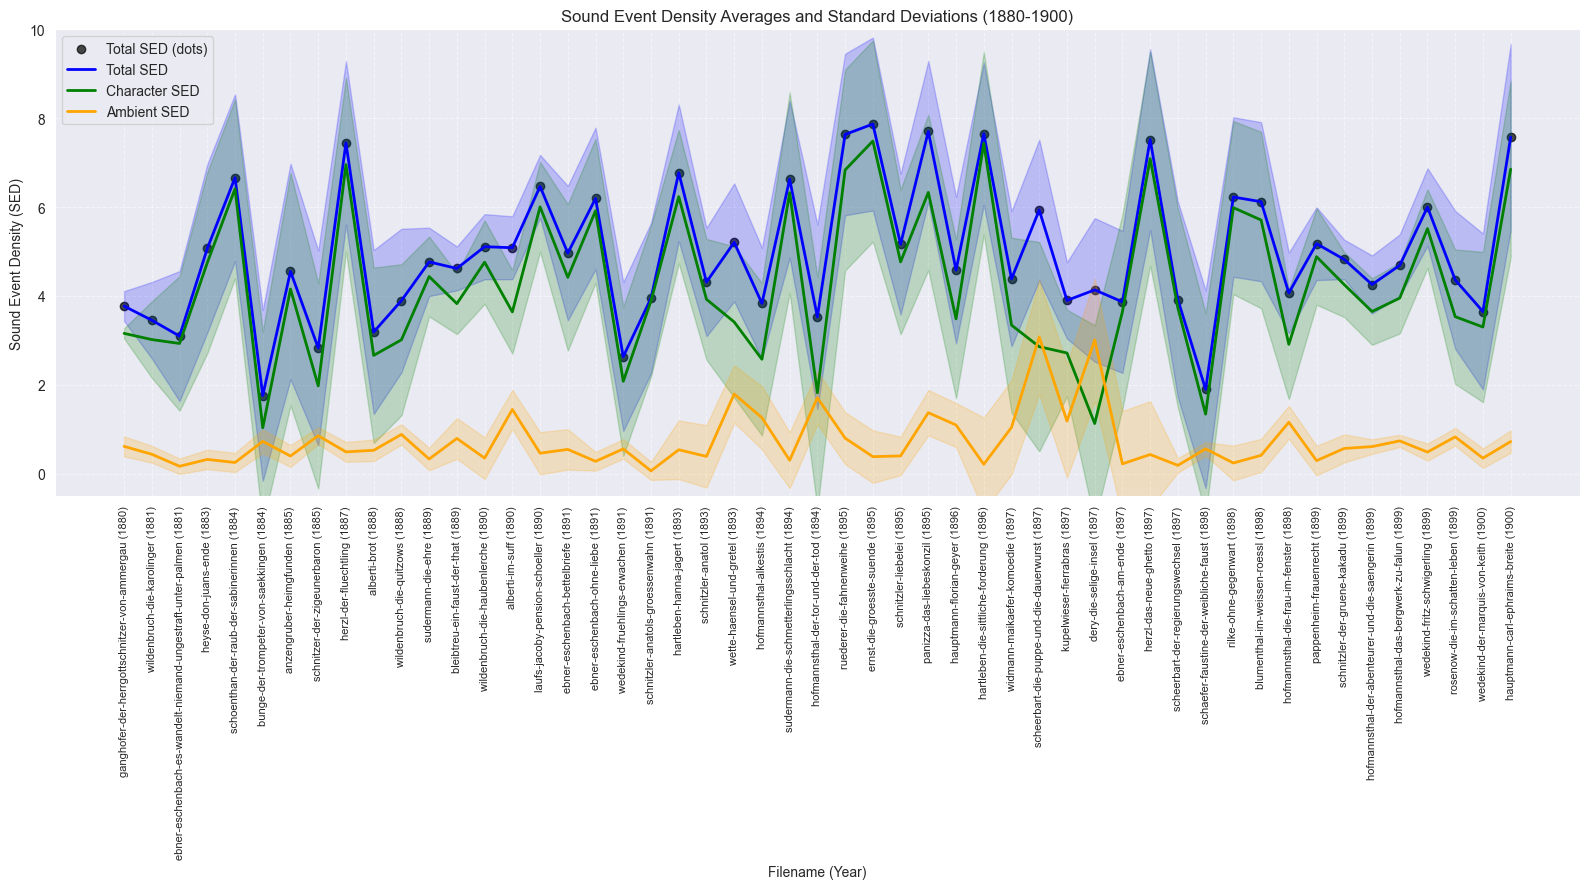

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter for 1850–1900 texts
df_19c = df[(df['yearNormalized'] >= 1880) & (df['yearNormalized'] < 1901)].copy()

# Calculate true SED values
df_19c['SED_total'] = (df_19c['total_se_count_without_nan'] / df_19c['t_se_aver_without_nan']) * 100
df_19c['SED_character'] = (df_19c['character_se_count_without_nan'] / df_19c['t_se_aver_without_nan']) * 100
df_19c['SED_ambient'] = (df_19c['ambient_se_count_without_nan'] / df_19c['t_se_aver_without_nan']) * 100

# Sort the filtered DataFrame
df_sorted = df_19c.sort_values(by='yearNormalized').reset_index(drop=True)

# Create numeric x-axis values
x = np.arange(len(df_sorted))

# Custom x-axis labels
x_labels = df_sorted['filename'] + ' (' + df_sorted['yearNormalized'].astype(str) + ')'

# Rolling standard deviation function
window_size = 5
def rolling_std(series):
    return series.rolling(window=window_size, min_periods=1, center=True).std()

# Compute rolling standard deviations for SEDs
total_se_std = rolling_std(df_sorted['SED_total'])
char_se_std = rolling_std(df_sorted['SED_character'])
ambient_se_std = rolling_std(df_sorted['SED_ambient'])

# Plotting
plt.figure(figsize=(16, 9))

# Scatter plots
plt.scatter(x, df_sorted['SED_total'], label='Total SED (dots)', color='black', alpha=0.7)

# Line plots
plt.plot(x, df_sorted['SED_total'], label='Total SED', color='blue', linewidth=2)
plt.plot(x, df_sorted['SED_character'], label='Character SED', color='green', linewidth=2)
plt.plot(x, df_sorted['SED_ambient'], label='Ambient SED', color='orange', linewidth=2)

# Shaded std deviation areas
plt.fill_between(x,
                 df_sorted['SED_total'] - total_se_std,
                 df_sorted['SED_total'] + total_se_std,
                 color='blue', alpha=0.2)

plt.fill_between(x,
                 df_sorted['SED_character'] - char_se_std,
                 df_sorted['SED_character'] + char_se_std,
                 color='green', alpha=0.2)

plt.fill_between(x,
                 df_sorted['SED_ambient'] - ambient_se_std,
                 df_sorted['SED_ambient'] + ambient_se_std,
                 color='orange', alpha=0.2)

# Custom x-ticks
plt.xticks(ticks=x, labels=x_labels, rotation=90, fontsize=8)

# Y-axis limits
plt.ylim(-0.5, 10.0)

plt.xlabel('Filename (Year)')
plt.ylabel('Sound Event Density (SED)')
plt.title('Sound Event Density Averages and Standard Deviations (1880-1900)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save before showing
plt.savefig('/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_SED_true_values_1880-1900.png')
plt.show()


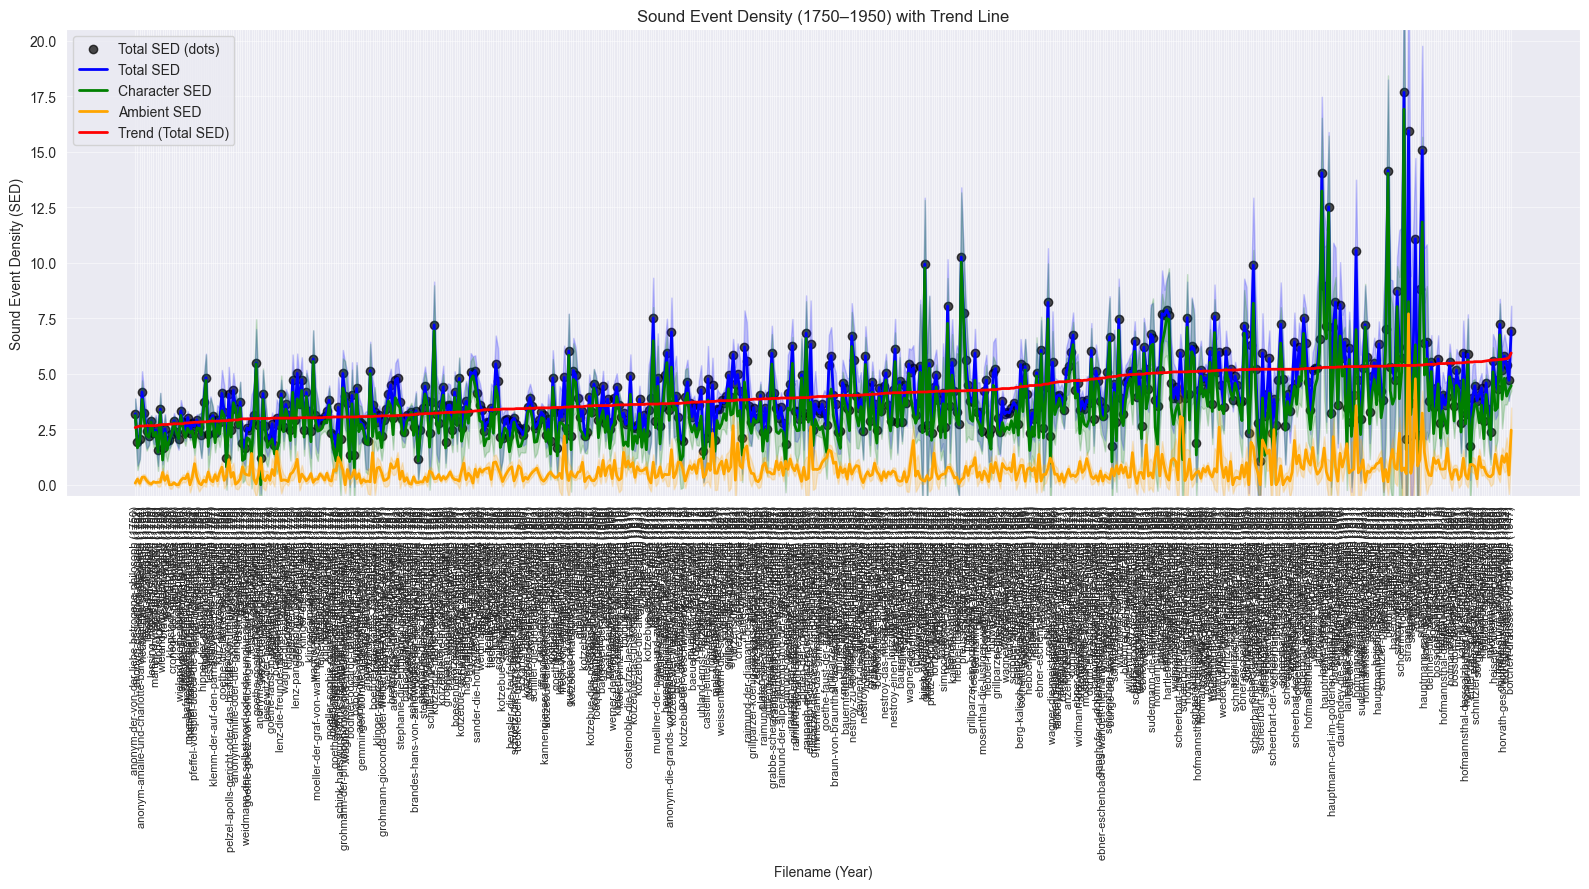

In [241]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Filter for 1750–1950 texts
df_period = df[(df['yearNormalized'] >= 1750) & (df['yearNormalized'] <= 1950)].copy()

# Calculate true SED values
df_period['SED_total'] = (df_period['total_se_count_without_nan'] / df_period['t_se_aver_without_nan']) * 100
df_period['SED_character'] = (df_period['character_se_count_without_nan'] / df_period['t_se_aver_without_nan']) * 100
df_period['SED_ambient'] = (df_period['ambient_se_count_without_nan'] / df_period['t_se_aver_without_nan']) * 100

# Sort by year
df_sorted = df_period.sort_values(by='yearNormalized').reset_index(drop=True)

# Create numeric x-axis values
x = np.arange(len(df_sorted))
x_years = df_sorted['yearNormalized'].values

# Custom x-axis labels
x_labels = df_sorted['filename'] + ' (' + df_sorted['yearNormalized'].astype(str) + ')'

# Rolling standard deviation function
window_size = 5
def rolling_std(series):
    return series.rolling(window=window_size, min_periods=1, center=True).std()

# Compute rolling standard deviations
total_se_std = rolling_std(df_sorted['SED_total'])
char_se_std = rolling_std(df_sorted['SED_character'])
ambient_se_std = rolling_std(df_sorted['SED_ambient'])

# Trend line for SED_total
slope, intercept, r_value, p_value, std_err = linregress(x_years, df_sorted['SED_total'])
trend_line = slope * x_years + intercept

# Plotting
plt.figure(figsize=(16, 9))

# Scatter plots
plt.scatter(x, df_sorted['SED_total'], label='Total SED (dots)', color='black', alpha=0.7)

# Line plots
plt.plot(x, df_sorted['SED_total'], label='Total SED', color='blue', linewidth=2)
plt.plot(x, df_sorted['SED_character'], label='Character SED', color='green', linewidth=2)
plt.plot(x, df_sorted['SED_ambient'], label='Ambient SED', color='orange', linewidth=2)

# Trend line in red
plt.plot(x, trend_line, color='red', linestyle='-', linewidth=2, label='Trend (Total SED)')

# Shaded std deviation areas
plt.fill_between(x,
                 df_sorted['SED_total'] - total_se_std,
                 df_sorted['SED_total'] + total_se_std,
                 color='blue', alpha=0.2)
plt.fill_between(x,
                 df_sorted['SED_character'] - char_se_std,
                 df_sorted['SED_character'] + char_se_std,
                 color='green', alpha=0.2)
plt.fill_between(x,
                 df_sorted['SED_ambient'] - ambient_se_std,
                 df_sorted['SED_ambient'] + ambient_se_std,
                 color='orange', alpha=0.2)

# Custom x-ticks
plt.xticks(ticks=x, labels=x_labels, rotation=90, fontsize=8)

# Y-axis limits
plt.ylim(-0.5, 20.5)

plt.xlabel('Filename (Year)')
plt.ylabel('Sound Event Density (SED)')
plt.title('Sound Event Density (1750–1950) with Trend Line')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout()

# Save before showing
plt.savefig('/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_SED_true_values_1750-1950_trend.png')
plt.show()


In [242]:
import pandas as pd
from scipy.stats import linregress

# Filter data for 1750-1950
df_period = df[(df['yearNormalized'] >= 1750) & (df['yearNormalized'] <= 1950)].copy()

# Calculate SED_total
df_period['SED_total'] = (df_period['total_se_count_without_nan'] / df_period['t_se_aver_without_nan']) * 100

# Extract years and SED_total values
years = df_period['yearNormalized'].values
sed_total = df_period['SED_total'].values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, sed_total)

print(f"Slope of SED_total trend: {slope:.5f}")
print(f"Intercept: {intercept:.5f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value for slope significance: {p_value:.5e}")

if p_value < 0.05:
    print("The rise/fall of SED_total between 1750 and 1950 is statistically significant.")
else:
    print("No statistically significant trend in SED_total between 1750 and 1950.")


Slope of SED_total trend: 0.01705
Intercept: -27.25401
R-squared: 0.2224
P-value for slope significance: 9.02632e-35
The rise/fall of SED_total between 1750 and 1950 is statistically significant.


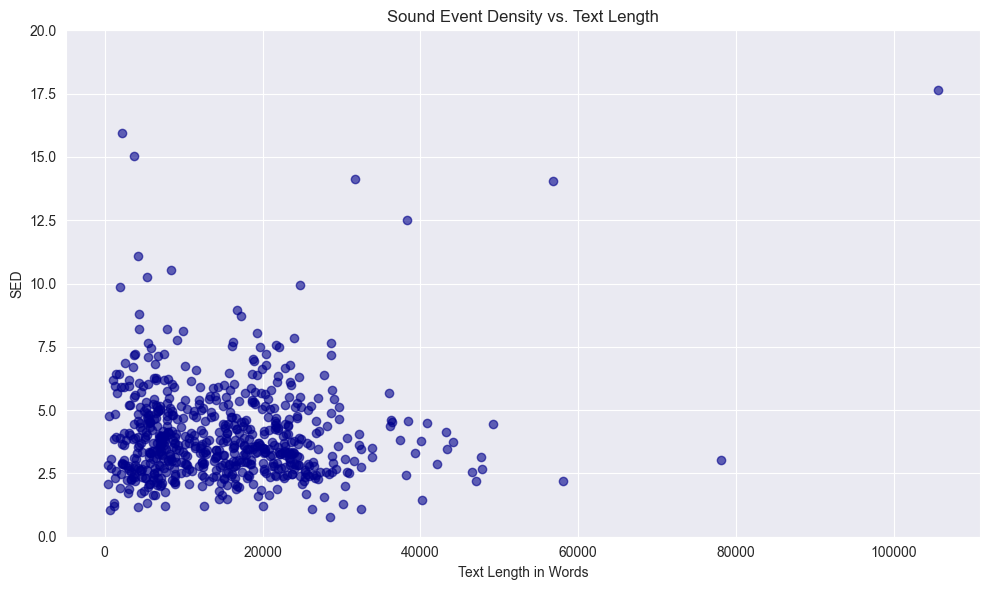

In [62]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(df_plot['wordCountText'], df_plot['SED_without_nan'], alpha=0.6, color='darkblue')
plt.xlabel('Text Length in Words')
plt.ylabel('SED')
plt.title('Sound Event Density vs. Text Length')
plt.ylim(0, 20)  # Force y-axis range
plt.grid(True)
plt.tight_layout()

# Save before showing
plt.savefig('/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_Correlation_between_text_length_and_SED.png')
plt.show()



In [64]:
# Optional: check correlation without that text
corr, pval = pearsonr(df_plot['wordCountText'], df_plot['SED_without_nan'])
print(f"Correlation between text length and SED: r = {corr:.3f}, p = {pval:.4f}")

Correlation between text length and SED: r = 0.072, p = 0.0657


In [61]:
# Exclude 'Ignorabimus' by Holz
df_filtered = df_plot[~((df_plot['filename'] == 'holz-ignorabimus'))].copy()


# Optional: check correlation without that text
corr, pval = pearsonr(df_filtered['wordCountText'], df_filtered['SED_without_nan'])
print(f"Correlation between text length and SED (excluding Ignorabimus): r = {corr:.3f}, p = {pval:.4f}")

# Create interactive scatter plot without the excluded text
fig = px.scatter(
    df_filtered,
    x='Tw',
    y='SED_without_nan',
    hover_name='filename',
    hover_data={
        'filename': True,
        'yearNormalized': True,
        'normalizedGenre': True,
        'genre': True,
        'Tw': True,
        'SED_without_nan': ':.2f'
    },
    labels={
        'Tw': 'Text Length (Tw)',
        'SED_without_nan': 'Sound Event Density (SED)'
    },
    title='Sound Event Density vs. Text Length (excluding Ignorabimus)',
    color_discrete_sequence=['darkblue']
)

# Layout styling
fig.update_layout(
    yaxis=dict(range=[0, 20]),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    title=dict(font=dict(color='black')),
    xaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
    yaxis_title_font=dict(color='black'),
    yaxis_tickfont=dict(color='black')
)

fig.show()


#fig.write_html("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sed_text-length_excl-Ignorabimus.html")
#print("Saved interactive plot ")

#fig.write_image("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sed_text-length_excl-Ignorabimus.png")
#print("Saved static plot")

Correlation between text length and SED (excluding Ignorabimus): r = -0.025, p = 0.5185


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['filename', 'yearNormalized', 'SED_without_nan', 'genre', 'normalizedGenre', 'wordCountText', 'x'] but received: Tw

In [33]:
import plotly.express as px
import pandas as pd
from scipy.stats import pearsonr

# Calculate Tw as the sum of the three relevant columns
df_plot['Tw'] = df_plot['wordCountText']

# Optional: check correlation
corr, pval = pearsonr(df_plot['Tw'], df_plot['SED_without_nan'])
print(f"Correlation between text length and SED: r = {corr:.3f}, p = {pval:.4f}")

# Create interactive scatter plot
fig = px.scatter(
    df_plot,
    x='Tw',
    y='SED_without_nan',
    hover_name='filename',
    hover_data={
        'filename': True,
        'yearNormalized': True,
        'normalizedGenre': True,
        'genre': True,
        'Tw': True,
        'SED_without_nan': ':.2f'
    },
    labels={
        'Tw': 'Text Length (Tw)',
        'SED_without_nan': 'Sound Event Density (SED)'
    },
    title='Sound Event Density vs. Text Length',
    color_discrete_sequence=['darkblue']
)

# Layout styling
fig.update_layout(
    yaxis=dict(range=[0, 20]),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    title=dict(font=dict(color='black')),
    xaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
    yaxis_title_font=dict(color='black'),
    yaxis_tickfont=dict(color='black')
)

fig.show()


fig.write_html("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sed_text-length_all.html")
print("Saved interactive plot ")

fig.write_image("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250806_GerDraCor_sed_text-length_all.png")
print("Saved static plot")


Correlation between text length and SED: r = 0.072, p = 0.0657


Saved interactive plot 
Saved static plot


In [72]:
df

,filename,id,wikidataId,firstAuthor,numOfCoAuthors,title,subtitle,normalizedGenre,digitalSource,originalSourcePublisher,...,ambient_avg_token_count_without_nan,total_avg_token_count_without_nan,t_se_aver_without_nan,character_se_count_without_nan,ambient_se_count_without_nan,total_se_count_without_nan,character_token_count_std_without_nan,ambient_token_count_std_without_nan,total_token_count_std_without_nan,SED_without_nan
0,achat-ein-april-scherz,ger000637,Q121463020,Achat,0,Ein April-Scherz,Original-Lustspiel in einem Akt,Comedy,https://books.google.com/books?id=qHNIAQAAMAAJ...,Vereins-Buchhandlung,...,1.83,2.47,2800.00,73,6,79,1.74,1.21,1.71,2.821429
1,adolph-am-ersten-mai,ger000569,Q111795417,Adolph,0,Am ersten Mai,Eine Tragikomödie der Arbeit aus Friedenstagen,NaN,https://www.projekt-gutenberg.org/adolph/am1ma...,NaN,...,3.28,2.71,2577.49,86,18,104,1.86,2.62,2.03,4.034933
2,alberti-brot,ger000171,Q51370104,Alberti,0,Brot!,Ein soziales Schauspiel in fünf Akten,NaN,http://www.textgridrep.org/textgrid:jkjf.0,NaN,...,2.98,3.04,8376.97,223,44,267,1.92,2.27,1.98,3.187310
3,alberti-im-suff,ger000041,Q51370930,Alberti,0,Im Suff,Naturalistische Spital-Katastrophe in zwei Vor...,NaN,http://www.textgridrep.org/textgrid:jkjb.0,NaN,...,3.56,3.45,3736.23,136,54,190,2.28,3.28,2.60,5.085340
4,alexander-die-verpfaendung,ger000630,Q120646668,Alexander,0,Die Verpfändung,Ein Schauspiel in einem Aufzuge,NaN,https://books.google.com/books?id=3GxUAAAAcAAJ...,Neumann,...,2.33,2.70,2258.52,113,3,116,1.91,1.89,1.91,5.136107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,wolf-professor-mamlock,ger000711,Q2713211,Wolf,0,Professor Mamlock,Ein Schauspiel,NaN,https://books.google.com/books?id=CZM_AQAACAAJ...,Aufbau Taschenbuch Verlag,...,2.90,2.38,6651.26,284,29,313,1.65,2.16,1.71,4.705875
645,zedlitz-cabinets-intriguen,ger000607,Q116869502,Zedlitz,0,Cabinets-Intriguen,Lustspiel in drei Aufzügen,Comedy,https://www.projekt-gutenberg.org/zedlitz/cabi...,Cotta,...,2.00,3.01,4189.37,97,4,101,1.90,1.22,1.89,2.410864
646,zedlitz-herr-und-sklave,ger000505,Q99642650,Zedlitz,0,Herr und Sklave,Trauerspiel in zwei Aufzügen,Tragedy,https://www.projekt-gutenberg.org/zedlitz/herr...,Cotta,...,2.80,2.69,1515.99,31,5,36,1.82,1.60,1.79,2.374686
647,zedlitz-liebe-findet-ihre-wege,ger000612,Q117712286,Zedlitz,0,Liebe findet ihre Wege,Lustspiel in vier Aufzügen,Comedy,https://www.projekt-gutenberg.org/zedlitz/lieb...,Cotta,...,1.71,2.68,5230.60,150,7,157,1.42,1.03,1.42,3.001568


In [155]:
# Assuming df is your DataFrame and 'genre' is the genre column
tragedy_sed = df[df['normalizedGenre'].str.contains('Tragedy', na=False)]['SED_without_nan']
comedy_sed = df[df['normalizedGenre'].str.contains('Comedy', na=False)]['SED_without_nan']


In [156]:
from scipy.stats import shapiro, levene

# Normality test
print("Tragedy normality p-value:", shapiro(tragedy_sed).pvalue)
print("Comedy normality p-value:", shapiro(comedy_sed).pvalue)

# Variance homogeneity
print("Variance homogeneity p-value:", levene(tragedy_sed, comedy_sed).pvalue)


Tragedy normality p-value: 2.220842670076746e-14
Comedy normality p-value: 9.172063121721644e-12
Variance homogeneity p-value: 0.6512331505628863


In [157]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(tragedy_sed, comedy_sed, alternative='two-sided')
print(f"Mann-Whitney U test: U = {u_stat}, p = {p_val:.5f}")


Mann-Whitney U test: U = 10037.0, p = 0.00004


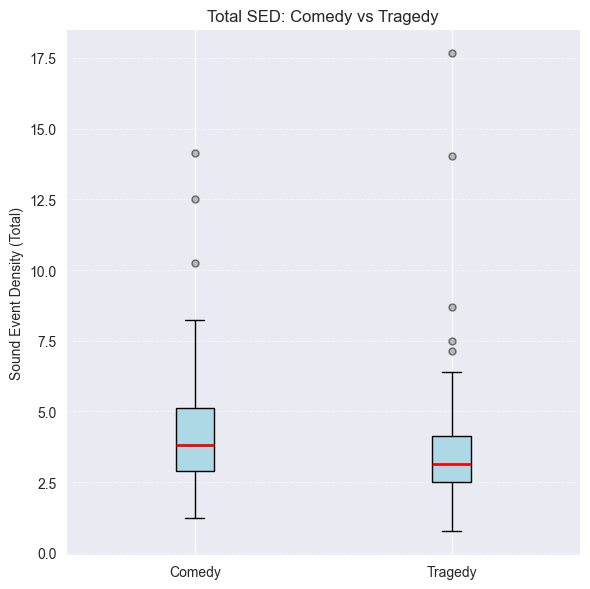

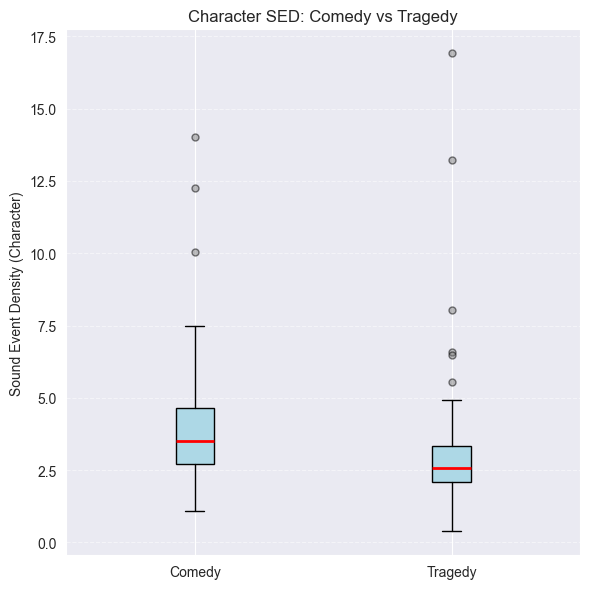

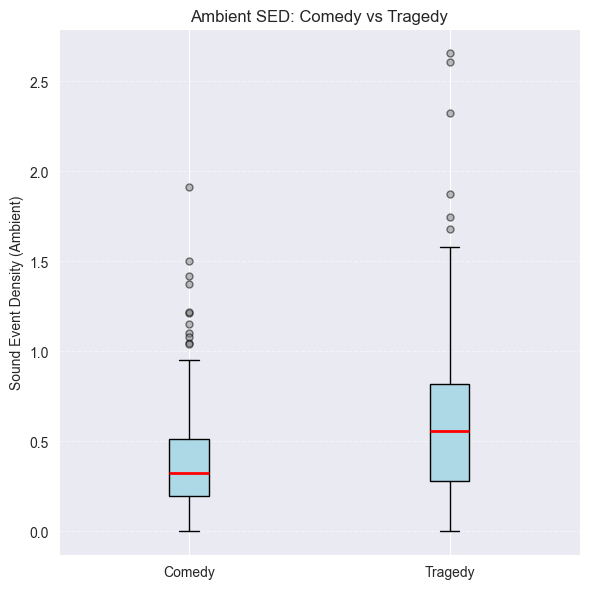

In [184]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Calculate true SED values ---
df['SED_total'] = (df['total_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100
df['SED_character'] = (df['character_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100
df['SED_ambient'] = (df['ambient_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100

# --- Filter only comedies and tragedies ---
df_filtered = df[df['normalizedGenre'].str.lower().isin(['comedy', 'tragedy'])].copy()

# --- Plot function ---
def plot_sed_boxplots(data, sed_column, ylabel, title, save_path):
    genres = ['comedy', 'tragedy']
    box_data = [data[data['normalizedGenre'].str.lower() == g][sed_column] for g in genres]

    plt.figure(figsize=(6, 6))
    plt.boxplot(box_data, tick_labels=[g.capitalize() for g in genres], patch_artist=True,
                boxprops=dict(facecolor="lightblue", color="black"),
                medianprops=dict(color="red", linewidth=2),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                flierprops=dict(markerfacecolor="gray", marker="o", markersize=5, alpha=0.5))

    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()


# --- Generate boxplots for each SED type ---
plot_sed_boxplots(df_filtered, 'SED_total', 'Sound Event Density (Total)',
                  'Total SED: Comedy vs Tragedy', 'SED_boxplot_total.png')

plot_sed_boxplots(df_filtered, 'SED_character', 'Sound Event Density (Character)',
                  'Character SED: Comedy vs Tragedy', 'SED_boxplot_character.png')

plot_sed_boxplots(df_filtered, 'SED_ambient', 'Sound Event Density (Ambient)',
                  'Ambient SED: Comedy vs Tragedy', 'SED_boxplot_ambient.png')


In [75]:
import matplotlib.pyplot as plt

def plot_sed_boxplots(data, sed_column, ylabel, title, save_path):
    genres = ['comedy', 'tragedy']
    box_data = [data[data['normalizedGenre'].str.lower() == g][sed_column] for g in genres]

    plt.figure(figsize=(6, 6))
    plt.boxplot(
        box_data,
        tick_labels=[g.capitalize() for g in genres],  # updated to avoid deprecation warning
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="gray", marker="o", markersize=5, alpha=0.5)
    )

    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Save as PNG
    plt.savefig(save_path, dpi=300)
    plt.close()


In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Calculate true SED values ---
df['SED_total'] = (df['total_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100
df['SED_character'] = (df['character_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100
df['SED_ambient'] = (df['ambient_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100

# --- Filter only comedies and tragedies ---
df_filtered = df[df['normalizedGenre'].str.lower().isin(['comedy', 'tragedy'])].copy()

# --- Plot function ---
def plot_sed_boxplots(data, sed_column, ylabel, title, save_path):
    genres = ['comedy', 'tragedy']
    box_data = [data[data['normalizedGenre'].str.lower() == g][sed_column] for g in genres]

    plt.figure(figsize=(6, 6))
    plt.boxplot(
        box_data,
        tick_labels=[g.capitalize() for g in genres],  # updated to avoid deprecation warning
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="gray", marker="o", markersize=5, alpha=0.5)
    )

    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.close()

# --- Output directory ---
output_dir = "/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250808_box-plots"

# --- Generate and save plots ---
plot_sed_boxplots(
    df_filtered, "SED_total",
    ylabel="Sound Event Density (Total)",
    title="Total SED: Comedy vs. Tragedy",
    save_path=f"{output_dir}/SED_boxplot_total.png"
)

plot_sed_boxplots(
    df_filtered, "SED_character",
    ylabel="Sound Event Density (Character)",
    title="Character SED: Comedy vs. Tragedy",
    save_path=f"{output_dir}/SED_boxplot_character.png"
)

plot_sed_boxplots(
    df_filtered, "SED_ambient",
    ylabel="Sound Event Density (Ambient)",
    title="Ambient SED: Comedy vs. Tragedy",
    save_path=f"{output_dir}/SED_boxplot_ambient.png"
)


In [81]:
from scipy.stats import ttest_ind, mannwhitneyu

sed_types = ["SED_total", "SED_character", "SED_ambient"]

for sed in sed_types:
    comedy_vals = df_filtered[df_filtered['normalizedGenre'].str.lower() == 'comedy'][sed]
    tragedy_vals = df_filtered[df_filtered['normalizedGenre'].str.lower() == 'tragedy'][sed]
    
    # Welch's t-test
    t_stat, t_p = ttest_ind(comedy_vals, tragedy_vals, equal_var=False)
    # Mann–Whitney U
    u_stat, u_p = mannwhitneyu(comedy_vals, tragedy_vals, alternative='two-sided')
    
    print(f"\n--- {sed} ---")
    print(f"T-test: t={t_stat:.3f}, p={t_p:.4f}")
    print(f"Mann–Whitney U: U={u_stat}, p={u_p:.4f}")



--- SED_total ---
T-test: t=2.953, p=0.0035
Mann–Whitney U: U=17263.0, p=0.0000

--- SED_character ---
T-test: t=4.329, p=0.0000
Mann–Whitney U: U=19017.0, p=0.0000

--- SED_ambient ---
T-test: t=-5.219, p=0.0000
Mann–Whitney U: U=9046.0, p=0.0000


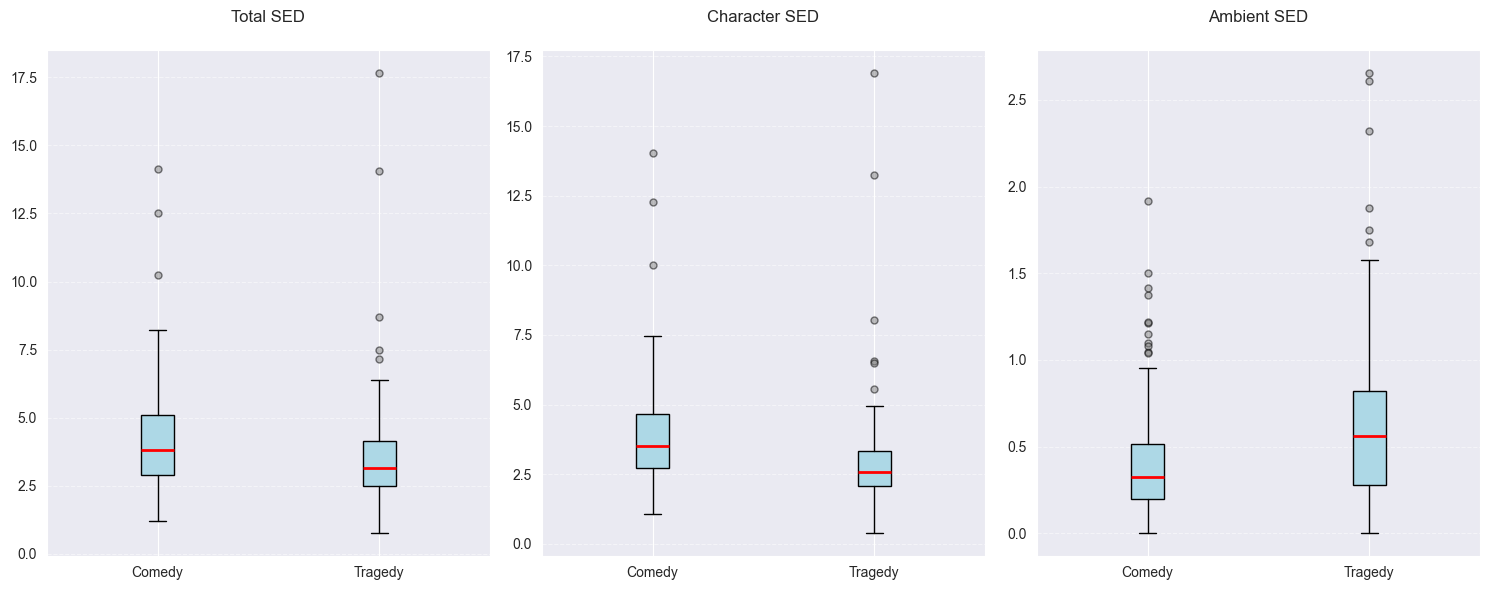

In [185]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

# --- 1. Calculate true SED values ---
df['SED_total'] = (df['total_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100
df['SED_character'] = (df['character_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100
df['SED_ambient'] = (df['ambient_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100

# --- 2. Filter only comedies and tragedies ---
df_filtered = df[df['normalizedGenre'].str.lower().isin(['comedy', 'tragedy'])].copy()

# --- 3. Prepare plotting ---
sed_types = [
    ("SED_total", "Total SED"),
    ("SED_character", "Character SED"),
    ("SED_ambient", "Ambient SED")
]

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=False)

for ax, (col, title) in zip(axes, sed_types):
    genres = ['comedy', 'tragedy']
    data = [df_filtered[df_filtered['normalizedGenre'].str.lower() == g][col] for g in genres]
    
    # Boxplot
    ax.boxplot(
        data,
        tick_labels=[g.capitalize() for g in genres],
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="gray", marker="o", markersize=5, alpha=0.5)
    )
    
    # T-test
    t_stat, p_val = ttest_ind(data[0], data[1], equal_var=False)
    
    # Format p-value
    if p_val < 0.0001:
        p_text = f"p < 0.0001"
    else:
        p_text = f"p = {p_val:.4f}"
    
    # Find y-position just above the highest data point
    y_max = max(max(d) for d in data)
    y_pos = y_max + (0.05 * y_max)  # 5% higher than max
    
    # Annotate p-value above the boxes
    #ax.text(1.5, y_pos, p_text, ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax.set_title(title, pad=20)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250808_box-plots/SED_boxplots_without_pvalues.png", dpi=300)
plt.show()


In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# --- Calculate true SED values ---
df['SED_total'] = (df['total_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100
df['SED_character'] = (df['character_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100
df['SED_ambient'] = (df['ambient_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100

# --- Define periods ---
periods = {
    "Renaissance (1500–1600)": (1500, 1600),
    "Barock (1600–1750)": (1600, 1750),
    "Aufklärung (1720–1800)": (1720, 1800),
    "Empfindsamkeit (1740–1780)": (1740, 1780),
    "Sturm und Drang (1770–1785)": (1770, 1785),
    "Weimarer Klassik (1786–1805)": (1786, 1805),
    "Romantik (1795–1835)": (1795, 1835),
    "Biedermeier (1815–1850)": (1815, 1850),
    "Vormärz (1830–1848)": (1830, 1848),
    "Realismus (1848–1897)": (1848, 1897),
    "Naturalismus (1880–1900)": (1880, 1900),
    "Jahrhundertwende (1890–1920)": (1890, 1920),
    "Expressionismus (1910–1925)": (1910, 1925),
    "Zwischen den Kriegen (1919-1939)": (1919, 1939),
    "Nachkriegszeit (1945-1950)": (1945, 1950)
}

# --- Assign period labels ---
def assign_period(year):
    for label, (start, end) in periods.items():
        if start <= year <= end:
            return label
    return None

df['period'] = df['yearNormalized'].apply(assign_period)

# Filter only rows with a matching period
df_period_filtered = df[df['period'].notna()].copy()

# Sort periods in desired order
period_order = list(periods.keys())
df_period_filtered['period'] = pd.Categorical(df_period_filtered['period'], categories=period_order, ordered=True)

# --- Plot function ---
def plot_sed_by_period(data, sed_column, ylabel, title, save_path):
    box_data = [data[data['period'] == period][sed_column] for period in period_order]

    plt.figure(figsize=(12, 6))
    plt.boxplot(
        box_data,
        tick_labels=period_order,
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="gray", marker="o", markersize=5, alpha=0.5)
    )

    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.close()

# --- Output directory ---
output_dir = "/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250808_box-plots"
os.makedirs(output_dir, exist_ok=True)

# --- Generate plots ---
plot_sed_by_period(df_period_filtered, "SED_total",
                   "Sound Event Density (Total)",
                   "Total SED by Literary Period",
                   f"{output_dir}/SED_boxplot_period_total.png")

plot_sed_by_period(df_period_filtered, "SED_character",
                   "Sound Event Density (Character)",
                   "Character SED by Literary Period",
                   f"{output_dir}/SED_boxplot_period_character.png")

plot_sed_by_period(df_period_filtered, "SED_ambient",
                   "Sound Event Density (Ambient)",
                   "Ambient SED by Literary Period",
                   f"{output_dir}/SED_boxplot_period_ambient.png")


In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: periods with possible overlaps
periods = {
    "Renaissance (1500–1600)": (1500, 1600),
    "Barock (1600–1750)": (1600, 1750),
    "Aufklärung (1720–1800)": (1720, 1800),
    "Empfindsamkeit (1740–1780)": (1740, 1780),
    "Sturm und Drang (1770–1785)": (1770, 1785),
    "Weimarer Klassik (1786–1805)": (1786, 1805),
    "Romantik (1795–1835)": (1795, 1835),
    "Biedermeier (1815–1850)": (1815, 1850),
    "Vormärz (1830–1848)": (1830, 1848),
    "Realismus (1848–1897)": (1848, 1897),
    "Naturalismus (1880–1900)": (1880, 1900),
    "Jahrhundertwende (1890–1920)": (1890, 1920),
    "Expressionismus (1910–1925)": (1910, 1925),
    "Zwischen den Kriegen (1919-1939)": (1919, 1939),
    "Nachkriegszeit (1945-1950)": (1945, 1950)
}

# Step 1: duplicate rows for multiple period matches
df_expanded = []
for _, row in df.iterrows():
    year = row['yearNormalized']
    if pd.notna(year):
        for period, (start, end) in periods.items():
            if start <= year <= end:
                row_copy = row.copy()
                row_copy['period'] = period
                df_expanded.append(row_copy)
df_expanded = pd.DataFrame(df_expanded)

# Step 2: plotting function
def plot_sed_boxplots_periods(data, sed_column, ylabel, title, save_path):
    period_order = list(periods.keys())
    box_data = [data[data['period'] == p][sed_column].dropna() for p in period_order]
    n_texts = [len(d) for d in box_data]

    plt.figure(figsize=(12, 6))
    plt.boxplot(
        box_data,
        tick_labels=[f"{p}\n(n={n})" for p, n in zip(period_order, n_texts)],
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="gray", marker="o", markersize=5, alpha=0.5)
    )
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.close()

# Step 3: save plots for all SED types
output_dir = "/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250808_box-plots"

plot_sed_boxplots_periods(df_expanded, "SED_total", "Sound Event Density (Total)",
                          "Total SED by Period", f"{output_dir}/SED_period_total.png")
plot_sed_boxplots_periods(df_expanded, "SED_character", "Sound Event Density (Character)",
                          "Character SED by Period", f"{output_dir}/SED_period_character.png")
plot_sed_boxplots_periods(df_expanded, "SED_ambient", "Sound Event Density (Ambient)",
                          "Ambient SED by Period", f"{output_dir}/SED_period_ambient.png")


In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: periods with possible overlaps
periods = {
    #"Renaissance (1500–1600)": (1500, 1600),
    "Barock (1600–1750)": (1600, 1750),
    #"Aufklärung (1720–1800)": (1720, 1800),
    #"Empfindsamkeit (1740–1780)": (1740, 1780),
    #"Sturm und Drang (1770–1785)": (1770, 1785),
    #"Weimarer Klassik (1786–1805)": (1786, 1805),
    "Romantik (1795–1835)": (1795, 1835),
    #"Biedermeier (1815–1850)": (1815, 1850),
    #"Vormärz (1830–1848)": (1830, 1848),
    #"Realismus (1848–1897)": (1848, 1897),
    "Naturalismus (1880–1900)": (1880, 1900),
    #"Jahrhundertwende (1890–1920)": (1890, 1920),
    "Expressionismus (1910–1925)": (1910, 1925),
    #"Zwischen den Kriegen (1919-1939)": (1919, 1939),
    #"Nachkriegszeit (1945-1950)": (1945, 1950)
}

# Step 1: duplicate rows for multiple period matches
df_expanded = []
for _, row in df.iterrows():
    year = row['yearNormalized']
    if pd.notna(year):
        for period, (start, end) in periods.items():
            if start <= year <= end:
                row_copy = row.copy()
                row_copy['period'] = period
                df_expanded.append(row_copy)
df_expanded = pd.DataFrame(df_expanded)

# Step 2: plotting function
def plot_sed_boxplots_periods(data, sed_column, ylabel, title, save_path):
    period_order = list(periods.keys())
    box_data = [data[data['period'] == p][sed_column].dropna() for p in period_order]
    n_texts = [len(d) for d in box_data]

    plt.figure(figsize=(12, 6))
    plt.boxplot(
        box_data,
        tick_labels=[f"{p}\n(n={n})" for p, n in zip(period_order, n_texts)],
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="gray", marker="o", markersize=5, alpha=0.5)
    )
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.close()

# Step 3: save plots for all SED types
output_dir = "/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250808_box-plots/selected_periods"

plot_sed_boxplots_periods(df_expanded, "SED_total", "Sound Event Density (Total)",
                          "Total SED by Period", f"{output_dir}/SED_period_total.png")
plot_sed_boxplots_periods(df_expanded, "SED_character", "Sound Event Density (Character)",
                          "Character SED by Period", f"{output_dir}/SED_period_character.png")
plot_sed_boxplots_periods(df_expanded, "SED_ambient", "Sound Event Density (Ambient)",
                          "Ambient SED by Period", f"{output_dir}/SED_period_ambient.png")


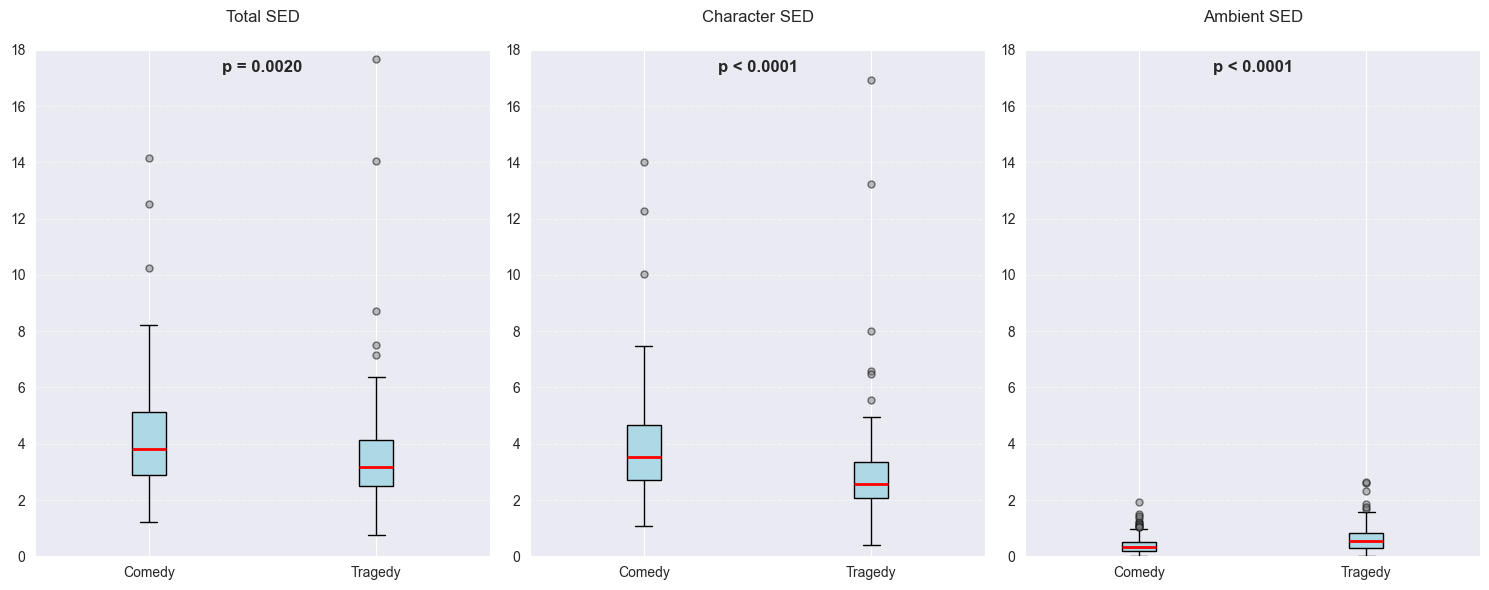

In [186]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

# --- 1. Calculate true SED values ---
df['SED_total'] = (df['total_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100
df['SED_character'] = (df['character_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100
df['SED_ambient'] = (df['ambient_se_count_without_nan'] / df['t_se_aver_without_nan']) * 100

# --- 2. Filter only comedies and tragedies ---
df_filtered = df[df['normalizedGenre'].str.lower().isin(['comedy', 'tragedy'])].copy()

# --- 3. Prepare plotting ---
sed_types = [
    ("SED_total", "Total SED"),
    ("SED_character", "Character SED"),
    ("SED_ambient", "Ambient SED")
]

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=False)

for ax, (col, title) in zip(axes, sed_types):
    genres = ['comedy', 'tragedy']
    data = [df_filtered[df_filtered['normalizedGenre'].str.lower() == g][col] for g in genres]
    
    # Boxplot
    ax.boxplot(
        data,
        tick_labels=[g.capitalize() for g in genres],
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="gray", marker="o", markersize=5, alpha=0.5)
    )
    
    # T-test
    t_stat, p_val = ttest_ind(data[0], data[1], equal_var=False)
    
    # Format p-value
    if p_val < 0.0001:
        p_text = f"p < 0.0001"
    else:
        p_text = f"p = {p_val:.4f}"
    
    # Position p-value annotation a bit above the top of the plot (at y=18)
    ax.text(1.5, 18 * 0.95, p_text, ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax.set_ylim(0, 18)  # Fix y-axis from 0 to 18
    ax.set_title(title, pad=20)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250808_box-plots/SED_boxplots_with_pvalues.png", dpi=300)
plt.show()


In [98]:
import plotly.express as px
import pandas as pd
from scipy.stats import pearsonr

# Use 'numOfSpeakers' as 'NumSpeakers' for plotting and analysis
df['NumSpeakers'] = df['numOfSpeakers']  # create new column with consistent name

# Check correlation
corr, pval = pearsonr(df['NumSpeakers'], df['SED_without_nan'])
print(f"Correlation between number of speakers and SED: r = {corr:.3f}, p = {pval:.4f}")

# Create interactive scatter plot using 'NumSpeakers' consistently
fig = px.scatter(
    df,
    x='NumSpeakers',
    y='SED_without_nan',
    hover_name='filename',
    hover_data={
        'filename': True,
        'yearNormalized': True,
        'normalizedGenre': True,
        'genre': True,
        'NumSpeakers': True,
        'SED_without_nan': ':.2f'
    },
    labels={
        'NumSpeakers': 'Number of Speakers',
        'SED_without_nan': 'Sound Event Density (SED)'
    },
    title='Sound Event Density vs. Number of Speakers',
    color_discrete_sequence=['darkblue']
)

# Layout styling
fig.update_layout(
    yaxis=dict(range=[0, 20]),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    title=dict(font=dict(color='black')),
    xaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
    yaxis_title_font=dict(color='black'),
    yaxis_tickfont=dict(color='black')
)

fig.show()

fig.write_html("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250808_GerDraCor_sed_numOfSpeakers_all.html")
print("Saved interactive plot")

fig.write_image("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250808_GerDraCor_sed_numOfSpeakers_all.png")
print("Saved static plot")


Correlation between number of speakers and SED: r = -0.071, p = 0.0725


Saved interactive plot
Saved static plot


In [100]:
df

,filename,id,wikidataId,firstAuthor,numOfCoAuthors,title,subtitle,normalizedGenre,digitalSource,originalSourcePublisher,...,total_se_count_without_nan,character_token_count_std_without_nan,ambient_token_count_std_without_nan,total_token_count_std_without_nan,SED_without_nan,SED_total,SED_character,SED_ambient,period,NumSpeakers
0,achat-ein-april-scherz,ger000637,Q121463020,Achat,0,Ein April-Scherz,Original-Lustspiel in einem Akt,Comedy,https://books.google.com/books?id=qHNIAQAAMAAJ...,Vereins-Buchhandlung,...,79,1.74,1.21,1.71,2.821429,2.821429,2.607143,0.214286,Biedermeier (1815–1850),6
1,adolph-am-ersten-mai,ger000569,Q111795417,Adolph,0,Am ersten Mai,Eine Tragikomödie der Arbeit aus Friedenstagen,NaN,https://www.projekt-gutenberg.org/adolph/am1ma...,NaN,...,104,1.86,2.62,2.03,4.034933,4.034933,3.336579,0.698354,Jahrhundertwende (1890–1920),7
2,alberti-brot,ger000171,Q51370104,Alberti,0,Brot!,Ein soziales Schauspiel in fünf Akten,NaN,http://www.textgridrep.org/textgrid:jkjf.0,NaN,...,267,1.92,2.27,1.98,3.187310,3.187310,2.662060,0.525250,Realismus (1848–1897),49
3,alberti-im-suff,ger000041,Q51370930,Alberti,0,Im Suff,Naturalistische Spital-Katastrophe in zwei Vor...,NaN,http://www.textgridrep.org/textgrid:jkjb.0,NaN,...,190,2.28,3.28,2.60,5.085340,5.085340,3.640033,1.445307,Realismus (1848–1897),14
4,alexander-die-verpfaendung,ger000630,Q120646668,Alexander,0,Die Verpfändung,Ein Schauspiel in einem Aufzuge,NaN,https://books.google.com/books?id=3GxUAAAAcAAJ...,Neumann,...,116,1.91,1.89,1.91,5.136107,5.136107,5.003276,0.132830,Aufklärung (1720–1800),13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,wolf-professor-mamlock,ger000711,Q2713211,Wolf,0,Professor Mamlock,Ein Schauspiel,NaN,https://books.google.com/books?id=CZM_AQAACAAJ...,Aufbau Taschenbuch Verlag,...,313,1.65,2.16,1.71,4.705875,4.705875,4.269868,0.436008,Zwischen den Kriegen (1919-1939),14
645,zedlitz-cabinets-intriguen,ger000607,Q116869502,Zedlitz,0,Cabinets-Intriguen,Lustspiel in drei Aufzügen,Comedy,https://www.projekt-gutenberg.org/zedlitz/cabi...,Cotta,...,101,1.90,1.22,1.89,2.410864,2.410864,2.315384,0.095480,Biedermeier (1815–1850),6
646,zedlitz-herr-und-sklave,ger000505,Q99642650,Zedlitz,0,Herr und Sklave,Trauerspiel in zwei Aufzügen,Tragedy,https://www.projekt-gutenberg.org/zedlitz/herr...,Cotta,...,36,1.82,1.60,1.79,2.374686,2.374686,2.044868,0.329817,Romantik (1795–1835),7
647,zedlitz-liebe-findet-ihre-wege,ger000612,Q117712286,Zedlitz,0,Liebe findet ihre Wege,Lustspiel in vier Aufzügen,Comedy,https://www.projekt-gutenberg.org/zedlitz/lieb...,Cotta,...,157,1.42,1.03,1.42,3.001568,3.001568,2.867740,0.133828,Romantik (1795–1835),6


In [103]:
# Count number of texts per author
author_counts = df['firstAuthor'].value_counts()

# Display the result
author_counts[:100]


firstAuthor
Goethe          23
Kotzebue        21
Scheerbart      19
Schnitzler      17
Hofmannsthal    17
                ..
Brentano         2
Essig            2
Brawe            2
Laube            2
Uhland           2
Name: count, Length: 100, dtype: int64

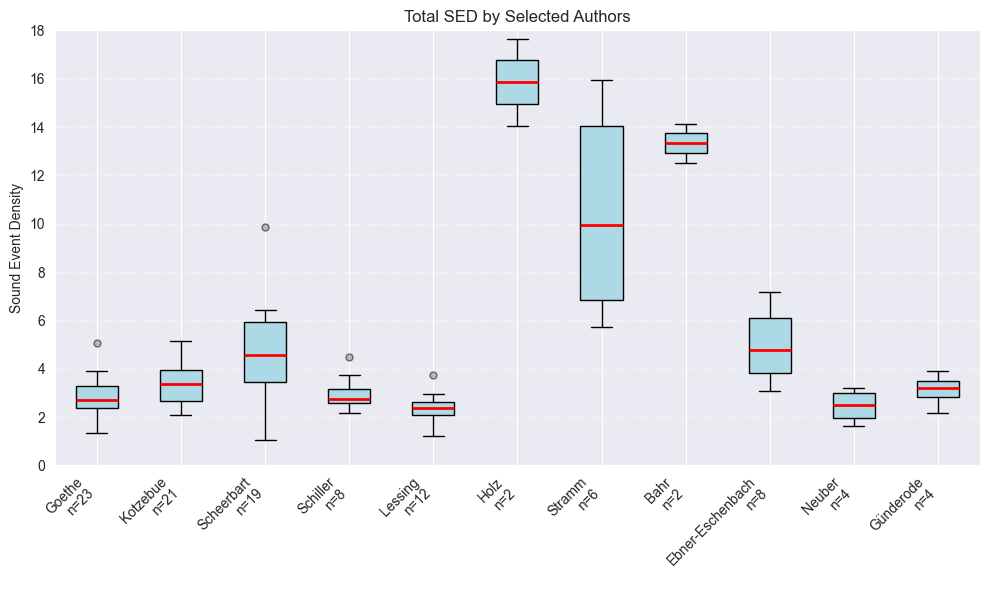

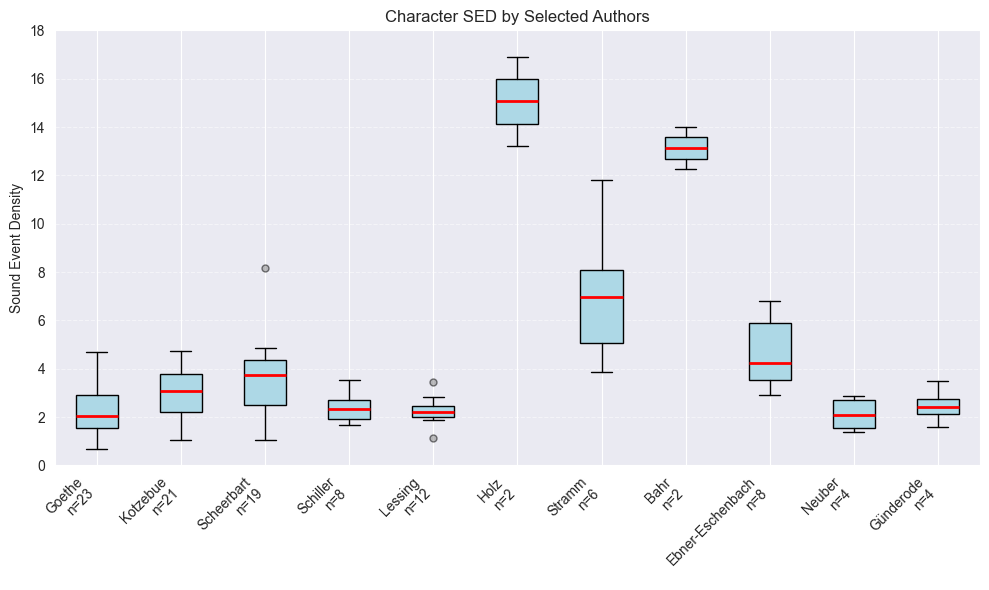

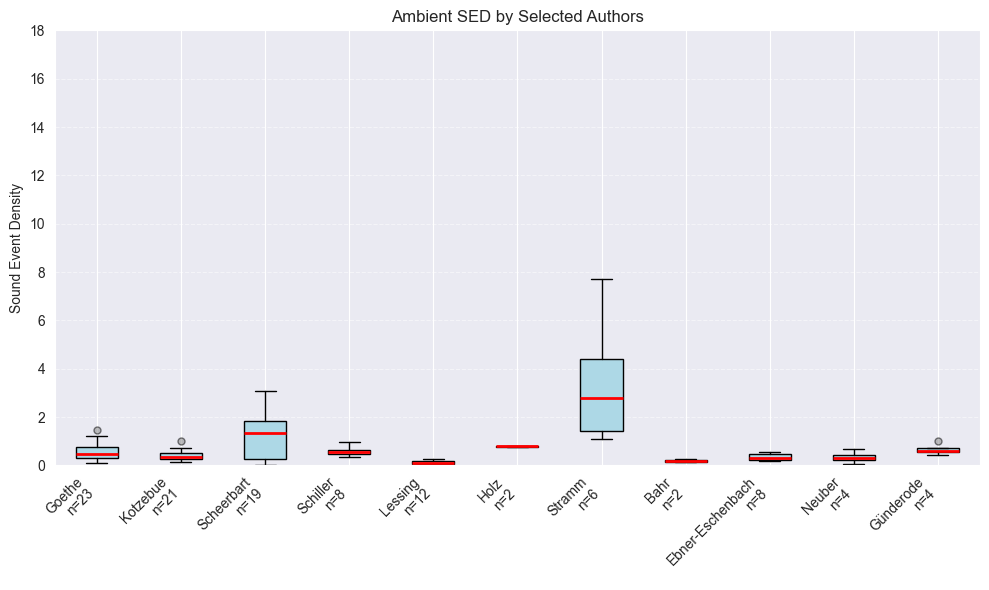

In [254]:
import matplotlib.pyplot as plt

# Define authors to filter
selected_authors = [
    "Goethe", "Kotzebue", "Scheerbart", "Schiller", "Lessing", "Holz", "Stramm", "Bahr", "Ebner-Eschenbach", "Neuber", "Günderode"
]

# Filter dataframe
df_authors = df[df['firstAuthor'].isin(selected_authors)].copy()

# Calculate counts for each author
author_counts = df['firstAuthor'].value_counts()

# Create tick labels with author name and count on second line
tick_labels = [f"{author}\nn={author_counts.get(author, 0)}" for author in selected_authors]

# SED types to plot
sed_types = [
    ("SED_total", "Total SED"),
    ("SED_character", "Character SED"),
    ("SED_ambient", "Ambient SED")
]

for sed_col, title in sed_types:
    plt.figure(figsize=(10, 6))
    
    # Prepare data: list of series, one per author
    data = [df_authors[df_authors['firstAuthor'] == author][sed_col] for author in selected_authors]
    
    # Boxplot
    plt.boxplot(
        data,
        tick_labels=tick_labels,
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="gray", marker="o", markersize=5, alpha=0.5)
    )
    
    plt.ylim(0, 18)  # Fix y-axis limits here
    
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Sound Event Density")
    plt.title(f"{title} by Selected Authors")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    # Save plot
    plt.savefig(f"/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250808_box-plots/SED_boxplot_{sed_col}_13_authors.png", dpi=300)
    plt.show()


In [255]:
# First, create a new column for the proportion of ambient sounds per text
df_authors['ambient_proportion'] = df_authors['SED_ambient'] / df_authors['SED_total']

# Then, calculate the mean proportion per author
ambient_prop_per_author = df_authors.groupby('firstAuthor')['ambient_proportion'].mean()

# Filter to keep only the selected authors and print results
ambient_prop_selected = ambient_prop_per_author.loc[selected_authors]
print(ambient_prop_selected)


firstAuthor
Goethe              0.232174
Kotzebue            0.125799
Scheerbart          0.231538
Schiller            0.192486
Lessing             0.049543
Holz                0.050392
Stramm              0.303469
Bahr                0.014628
Ebner-Eschenbach    0.072430
Neuber              0.144051
Günderode           0.220130
Name: ambient_proportion, dtype: float64


In [110]:
df['ambient_sound_ratio'] = df['ambient_se_count_without_nan'] / df['total_se_count_without_nan']

df['ambient_sound_percentage'] = df['ambient_sound_ratio'] * 100
df

In [117]:
import plotly.express as px
import pandas as pd

# Ensure necessary columns exist and drop rows with missing data
df_plot = df.dropna(subset=['yearNormalized', 'ambient_sound_ratio', 'firstAuthor', 'SED_total', 'filename'])

# Sort by year for better timeline visualization (optional, not needed if no lines)
df_plot = df_plot.sort_values('yearNormalized')

fig = px.scatter(
    df_plot,
    x='yearNormalized',
    y='ambient_sound_ratio',
    hover_data={
        'ambient_sound_ratio': ':.3f',
        'firstAuthor': True,
        'yearNormalized': True,
        'SED_total': ':.2f',
        'filename': True
    },
    labels={
        'yearNormalized': 'Year of Publication',
        'ambient_sound_ratio': 'Ambient Sound Ratio'
    },
    title='Ambient Sound Ratio over Years',
    color='firstAuthor',  # optional: color points by author
    template='plotly_white'
)

# Show only markers, no lines
fig.update_traces(mode='markers', marker=dict(size=8, opacity=0.7))

# Save interactive plot as HTML
html_path = "/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250808_ambient_sound_ratio_over_years.html"
fig.write_html(html_path)
print(f"Saved interactive plot as {html_path}")

# Save static plot as PNG
png_path = "/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250808_ambient_sound_ratio_over_years.png"
fig.write_image(png_path)
print(f"Saved static plot as {png_path}")

fig.show()


Saved interactive plot as /Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250808_ambient_sound_ratio_over_years.html
Saved static plot as /Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250808_ambient_sound_ratio_over_years.png


In [ ]:
import pandas as pd

# Given full author names
full_names = [
    "Ahlefeld", "Alexis", "Arndt", "Arnim", "Bernhardi", "Brentano", "Chamisso", "Eichendorff", "Fischer", "Fouqué", "Goethe", "Hahn", "Hauff", "Heine", "Hoffmann", "Jacobi", "Kleist", "Klingemann", "Liebeskind", "Moritz", "Mundt", "Naubert", "Schiller", "Schilling", "Schlegel", "Spindler", "Tieck", "Uhland", "Unger", "Wobeser", "Zschokke"
]

# Extract last names, handling special cases like 'Novalis (Friedrich von Hardenberg)'
def extract_last_name(full_name):
    # Remove parentheses content if any
    clean_name = full_name.split('(')[0].strip()
    # Split by spaces and take the last part
    last_name = clean_name.split()[-1]
    return last_name

last_names = [extract_last_name(name) for name in full_names]

# Optional: print to check
print("Last names extracted:", last_names)

# Filter dataframe by last names and yearNormalized range
filtered_df = df[
    (df['firstAuthor'].isin(last_names)) &
    (df['yearNormalized'] >= 1795) &
    (df['yearNormalized'] <= 1835)
].copy()

# Display the filtered dataframe info
print(f"Number of texts found: {len(filtered_df)}")
filtered_df.head()


In [214]:
import pandas as pd


romanticism_authors = [
    "Ahlefeld", "Alexis", "Arndt", "Arnim", "Bernhardi", "Brentano", "Chamisso", "Eichendorff",
    "Fischer", "Fouqué", "Goethe", "Hahn", "Hauff", "Heine", "Hoffmann", "Jacobi", "Kleist",
    "Klingemann", "Liebeskind", "Moritz", "Mundt", "Naubert", "Schiller", "Schilling", "Schlegel",
    "Spindler", "Tieck", "Uhland", "Unger", "Wobeser", "Zschokke",
]

# Initialize the new column with default None or empty string
df['literaryMovement'] = None

# Create a boolean mask for the conditions
mask = (df['firstAuthor'].isin(romanticism_authors)) & (df['yearNormalized'] >= 1795) & (df['yearNormalized'] <= 1835)

# Assign 'Romanticism' to rows matching the mask
df.loc[mask, 'literaryMovement'] = 'Romanticism'

# Optional: Check how many rows were assigned
print(f"Number of texts labeled 'Romanticism': {df['literaryMovement'].value_counts().get('Romanticism', 0)}")

# Display some of the rows for verification
df.loc[mask, ['firstAuthor', 'yearNormalized', 'literaryMovement']].head()


Number of texts labeled 'Romanticism': 46


,firstAuthor,yearNormalized,literaryMovement
25,Arnim,1811,Romanticism
26,Arnim,1811,Romanticism
27,Arnim,1811,Romanticism
28,Arnim,1826,Romanticism
85,Brentano,1814,Romanticism


In [215]:
import pandas as pd

# Load the CSV file into a DataFrame
genres_df = pd.read_csv("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/genres.csv")

# Define mapping for genre to add_genre
comedy_terms = ["Lustspiel", "Komödie"]
tragedy_terms = ["Trauerspiel", "Tragödie"]

# Create new column based on conditions
def classify_genre(genre):
    if pd.isna(genre):
        return None
    if genre in comedy_terms:
        return "comedy"
    elif genre in tragedy_terms:
        return "tragedy"
    return None

genres_df["add_genre"] = genres_df["genre"].apply(classify_genre)

# Save the updated DataFrame back to the same CSV file
genres_df.to_csv("/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/genres.csv", index=False)

print("Updated 'genres.csv' with new 'add_genre' column.")


Updated 'genres.csv' with new 'add_genre' column.


In [229]:
# List of authors taken from literary movement specific corpora and secondary literature

romanticism_authors = [
    "Ahlefeld", "Alexis", "Arndt", "Arnim", "Bernhardi", "Brentano", "Chamisso", "Eichendorff",
    "Fischer", "Fichte", "Fouqué", "Hahn", "Hauff", "Heine", "Hoffmann", "Günderode", "Jacobi", "Kleist", "Novalis", "Klingemann", "Liebeskind", "Mereau", "Moritz", "Mundt", "Naubert", "Schelling", "Schiller", "Schilling", "Schlegel", "Spindler", "Tieck", "Uhland", "Unger", "Wobeser", "Zschokke", #"Goethe",
]

realism_authors = [
    "Blumenreich", "Boy-Ed", "Buerstenbinder", "Dahn", "Duncker", "Ebers", "Eckstein", "Eyth", "Fontane", "Franzos", "Frapan", "Hausrath", "Heer", "Hollaender", "Holm", "Holzamer", "Jensen", "Keller", "Klemm", "Koch", "Kraft", "Kretzer", "Lasswitz", "Laube", "Mackay", "Marlitt", "Mauthner", "Moellhausen", "Niese", "Pajeken", "Raabe", "Reuter", "Riehl", "Rosegger", "Scheerbart", "Schmitthenner", "Schobert", "Schott", "Schubin", "Schumacher", "Schweichel", "Sophar", "Spyri", "Steinhausen", "Stinde", "Stratz",  "Treller", 
    "Brackel", "Dedenroth", "Ebner-Eschenbach", "Eschstruth", "Keyserling", "Perfall",  
    "Rhoden",  "Wildenbruch",  "Zobeltitz", "Voss", "Wassermann", "Weinland", 
    "Wichert", "Woerishoeffer", "Wolff", "Zapp", "Zolling", "Eulenburg-Hertefeld", "Megede"
]

naturalism_authors = [
    "Andreas-Salome", "Anzengruber", "Bahr", "Becker", "Bierbaum", "Bleibtreu", "Bölsche", "Conrad", "Conradi", "Dohm", "Ganghofer", "Hansjakob", "Hauptmann", "Heiberg", "Holz", "Polenz", "Schlaf", "Spielhagen", "Sudermann", "Suttner", "Telmann", "Wolzogen",
]

expressionism_authors = ["Heym", "Benn", "Becher", "Brecht", "Boldt", "Ehrenstein", "Lasker-Schüler", "Heym", "Hoddis", "Lichtenstein", "Trakl", "Döblin", "Kaiser", "Kafka", "Lotz", "Toller", "Einstein", "Rheiner", "Stadler", "Sternheim", "Stramm", "Wedekind", "Werfel"
]

# Mask for Realism authors
mask_romanticism = df['firstAuthor'].isin(romanticism_authors)
mask_realism = df['firstAuthor'].isin(realism_authors)
mask_naturalism = df['firstAuthor'].isin(naturalism_authors)
mask_expressionism = df['firstAuthor'].isin(expressionism_authors)

# Assign "Realism" where applicable
df.loc[mask_romanticism, 'literaryMovement'] = 'Romanticism'
df.loc[mask_realism, 'literaryMovement'] = 'Realism'
df.loc[mask_naturalism, 'literaryMovement'] = 'Naturalism'
df.loc[mask_expressionism, 'literaryMovement'] = 'Expressionism'

# Optional: Check how many were labeled as Realism
print(f"Number of texts labeled 'Romanticism': {df['literaryMovement'].value_counts().get('Romanticism', 0)}")

print(f"Number of texts labeled 'Realism': {df['literaryMovement'].value_counts().get('Realism', 0)}")
print(f"Number of texts labeled 'Naturalism': {df['literaryMovement'].value_counts().get('Naturalism', 0)}")
print(f"Number of texts labeled 'Expressionism': {df['literaryMovement'].value_counts().get('Expressionism', 0)}")

# Display a few results
df.loc[mask_expressionism, ['firstAuthor', 'yearNormalized', 'literaryMovement']]



Number of texts labeled 'Romanticism': 77
Number of texts labeled 'Realism': 38
Number of texts labeled 'Naturalism': 27
Number of texts labeled 'Expressionism': 21


,firstAuthor,yearNormalized,literaryMovement
269,Heym,1911,Expressionism
308,Kafka,1917,Expressionism
309,Kaiser,1845,Expressionism
310,Kaiser,1917,Expressionism
311,Kaiser,1847,Expressionism
312,Kaiser,1844,Expressionism
373,Lasker-Schüler,1909,Expressionism
569,Sternheim,1914,Expressionism
570,Stramm,1914,Expressionism
571,Stramm,1914,Expressionism


In [243]:
# Convert the DataFrame's firstAuthor column to a set for faster lookup
authors_in_df = set(df['firstAuthor'].unique())

# Find authors that appear in df for each movement
romanticism_in_df = [author for author in romanticism_authors if author in authors_in_df]
realism_in_df = [author for author in realism_authors if author in authors_in_df]
naturalism_in_df = [author for author in naturalism_authors if author in authors_in_df]
expressionism_in_df = [author for author in expressionism_authors if author in authors_in_df]

print("Romanticism authors in df:", romanticism_in_df)
print("Realism authors in df:", realism_in_df)
print("Naturalism authors in df:", naturalism_in_df)
print("Expressionism authors in df:", expressionism_in_df)


Romanticism authors in df: ['Arnim', 'Brentano', 'Eichendorff', 'Fouqué', 'Heine', 'Günderode', 'Kleist', 'Klingemann', 'Moritz', 'Schiller', 'Schlegel', 'Tieck', 'Uhland', 'Zschokke']
Realism authors in df: ['Klemm', 'Koch', 'Laube', 'Reuter', 'Scheerbart', 'Ebner-Eschenbach', 'Wildenbruch']
Naturalism authors in df: ['Anzengruber', 'Bahr', 'Bierbaum', 'Bleibtreu', 'Dohm', 'Ganghofer', 'Hauptmann', 'Holz', 'Sudermann']
Expressionism authors in df: ['Heym', 'Lasker-Schüler', 'Heym', 'Kaiser', 'Kafka', 'Toller', 'Sternheim', 'Stramm', 'Wedekind']


In [217]:
# Mask for Early 20th Century texts (1900 to 1925 inclusive)
mask_early20th = (df['yearNormalized'] >= 1900) & (df['yearNormalized'] <= 1920)


# Assign "Realism" where applicable
df.loc[mask_early20th, 'literaryMovement'] = 'Early 20th Century'

# Optional: Check how many were labeled as Realism
print(f"Number of texts labeled 'Early 20th Century': {df['literaryMovement'].value_counts().get('Early 20th Century', 0)}")

# Display a few results
df[['firstAuthor', 'literaryMovement']]




Number of texts labeled 'Early 20th Century': 107


,firstAuthor,literaryMovement
0,Achat,None
1,Adolph,Early 20th Century
2,Alberti,None
3,Alberti,None
4,Alexander,None
...,...,...
644,Wolf,None
645,Zedlitz,None
646,Zedlitz,None
647,Zedlitz,None


In [248]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: define literary movements of interest
movements = ["Romanticism", "Realism", "Naturalism", "Expressionism"]

# Step 2: plotting function for literary movements
def plot_sed_boxplots_movements(df, sed_column, ylabel, title, save_path):
    movement_order = movements
    box_data = [df[df['literaryMovement'] == m][sed_column].dropna() for m in movement_order]
    n_texts = [len(d) for d in box_data]

    # Filter out movements with no data to avoid empty boxplots
    filtered_data = [(m, d, n) for m, d, n in zip(movement_order, box_data, n_texts) if n > 0]
    if not filtered_data:
        print(f"No data available for {title}")
        return

    filtered_movements, filtered_box_data, filtered_n_texts = zip(*filtered_data)

    plt.figure(figsize=(10, 6))
    plt.boxplot(
        filtered_box_data,
        labels=[f"{m}\n(n={n})" for m, n in zip(filtered_movements, filtered_n_texts)],
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="gray", marker="o", markersize=5, alpha=0.5)
    )
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Ensure output directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    plt.savefig(save_path, dpi=300)
    plt.close()

# Step 3: save plots for all SED types for literary movements
output_dir = "/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250808_box-plots/literary_movements"

plot_sed_boxplots_movements(df, "SED_total", "Sound Event Density (Total)",
                            "Total SED by Literary Movement", f"{output_dir}/SED_movements_total2.png")
plot_sed_boxplots_movements(df, "SED_character", "Sound Event Density (Character)",
                            "Character SED by Literary Movement", f"{output_dir}/SED_movements_character2.png")
plot_sed_boxplots_movements(df, "SED_ambient", "Sound Event Density (Ambient)",
                            "Ambient SED by Literary Movement", f"{output_dir}/SED_movements_ambient2.png")


/var/folders/0l/jmlpg6g91sd3fl4ry6lcl8lw0000gn/T/ipykernel_64397/3753477815.py:23: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/var/folders/0l/jmlpg6g91sd3fl4ry6lcl8lw0000gn/T/ipykernel_64397/3753477815.py:23: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/var/folders/0l/jmlpg6g91sd3fl4ry6lcl8lw0000gn/T/ipykernel_64397/3753477815.py:23: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



In [279]:
#!pip install scikit-posthocs


In [249]:
import scipy.stats as stats
import scikit_posthocs as sp

def test_significance(df, sed_column, movements):
    # Gather data for each movement
    data_groups = [df[df['literaryMovement'] == m][sed_column].dropna() for m in movements]
    
    # Kruskal–Wallis test
    stat, p = stats.kruskal(*data_groups)
    print(f"Kruskal–Wallis test for {sed_column}: H={stat:.3f}, p={p:.4f}")
    
    # If significant, run pairwise Dunn's post-hoc test
    if p < 0.05:
        print("Post-hoc Dunn's test (Bonferroni corrected):")
        posthoc = sp.posthoc_dunn(data_groups, p_adjust='bonferroni')
        posthoc.index = movements
        posthoc.columns = movements
        print(posthoc)

# Run for each SED column
for col in ["SED_total", "SED_character", "SED_ambient"]:
    test_significance(df, col, movements)


Kruskal–Wallis test for SED_total: H=65.235, p=0.0000
Post-hoc Dunn's test (Bonferroni corrected):
                Romanticism   Realism    Naturalism  Expressionism
Romanticism    1.000000e+00  0.000424  4.836275e-12       0.000002
Realism        4.237635e-04  1.000000  7.368646e-03       0.499519
Naturalism     4.836275e-12  0.007369  1.000000e+00       1.000000
Expressionism  1.897583e-06  0.499519  1.000000e+00       1.000000
Kruskal–Wallis test for SED_character: H=64.303, p=0.0000
Post-hoc Dunn's test (Bonferroni corrected):
                Romanticism   Realism    Naturalism  Expressionism
Romanticism    1.000000e+00  0.000622  2.812274e-12       0.000007
Realism        6.216718e-04  1.000000  4.500348e-03       0.690586
Naturalism     2.812274e-12  0.004500  1.000000e+00       0.893643
Expressionism  6.816349e-06  0.690586  8.936430e-01       1.000000
Kruskal–Wallis test for SED_ambient: H=4.588, p=0.2045


In [250]:
import itertools
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Define movements and SED column
movements = ["Romanticism", "Realism", "Naturalism", "Expressionism"]
sed_column = "SED_total"

# Prepare pairwise comparisons
pairs = list(itertools.combinations(movements, 2))
results = []

for m1, m2 in pairs:
    data1 = df[df['literaryMovement'] == m1][sed_column].dropna()
    data2 = df[df['literaryMovement'] == m2][sed_column].dropna()
    
    stat, p = mannwhitneyu(data1, data2, alternative="two-sided")
    results.append((m1, m2, stat, p))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Group1", "Group2", "U_statistic", "p_value"])

# Apply Bonferroni correction
_, corrected_p, _, _ = multipletests(results_df["p_value"], method="bonferroni")
results_df["p_value_corrected"] = corrected_p

print(results_df)


        Group1         Group2  U_statistic       p_value  p_value_corrected
0  Romanticism        Realism        753.0  2.457337e-05       1.474402e-04
1  Romanticism     Naturalism        122.0  1.054277e-11       6.325662e-11
2  Romanticism  Expressionism        215.0  2.833480e-07       1.700088e-06
3      Realism     Naturalism        235.0  2.206720e-04       1.324032e-03
4      Realism  Expressionism        284.0  6.988255e-02       4.192953e-01
5   Naturalism  Expressionism        350.0  1.701708e-01       1.000000e+00


In [220]:
for m in movements:
    count = df[df['literaryMovement'] == m].shape[0]
    print(f"{m}: {count} plays")


Romanticism: 46 rows
Realism: 20 rows
Naturalism: 12 rows
Early 20th Century: 107 rows


/opt/anaconda3/lib/python3.11/site-packages/spacy/util.py:922: UserWarning:

[W095] Model 'de_core_news_sm' (3.7.0) was trained with spaCy v3.7.0 and may not be 100% compatible with the current version (3.8.7). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate



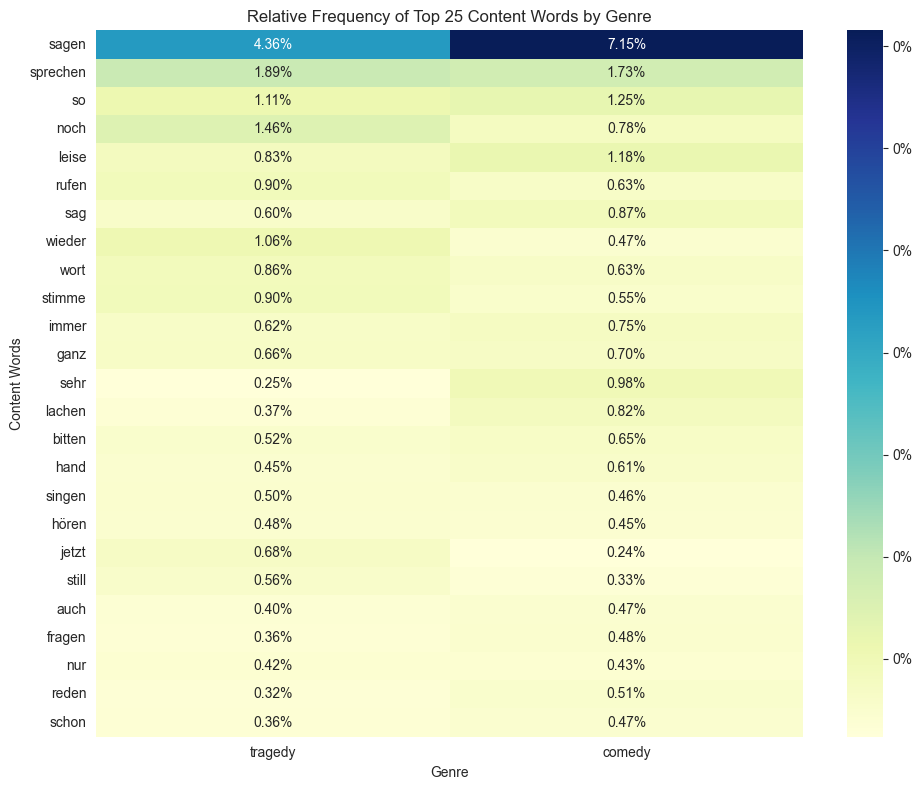

In [257]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# Load German spaCy model (make sure to have it installed)
# !python -m spacy download de_core_news_sm
nlp = spacy.load("de_core_news_sm")

# --- Helper function: extract content words from a tuple of tokens ---
def extract_content_words_from_tuple(token_tuple):
    words = []
    for token in token_tuple:
        doc = nlp(token)
        for tok in doc:
            # Keep only content words: NOUN, VERB, ADJ, ADV
            if tok.pos_ in {"NOUN", "VERB", "ADJ", "ADV"}:
                words.append(tok.lemma_.lower())  # Use lemmas and lowercase
    return words

# --- Helper function: parse dict column and extract content words ---
def extract_words_from_dict_column(dict_or_str):
    content_words_all = []
    if dict_or_str is None:
        return content_words_all

    if isinstance(dict_or_str, dict):
        dict_obj = dict_or_str
    else:
        try:
            dict_obj = ast.literal_eval(dict_or_str)
        except Exception as e:
            print(f"Warning: Could not parse dictionary string due to {e}")
            return content_words_all

    for key in dict_obj.keys():
        # Keys are tuples of tokens
        content_words_all.extend(extract_content_words_from_tuple(key))

    return content_words_all

# --- 1. Filter plays by subgenre ---
df_filtered = df[df['normalizedGenre'].str.lower().isin(['tragedy', 'comedy'])].copy()

# --- 2. Extract words for each play ---
df_filtered['content_words'] = df_filtered.apply(
    lambda row: extract_words_from_dict_column(row['character_sound-loudness_dictionary']) +
                extract_words_from_dict_column(row['ambient_sound-loudness_dictionary']),
    axis=1
)

# --- 3. Aggregate word counts by genre ---
genre_word_counts = {}
for genre in ['tragedy', 'comedy']:
    words = []
    subset = df_filtered[df_filtered['normalizedGenre'].str.lower() == genre]
    for cw_list in subset['content_words']:
        words.extend(cw_list)
    genre_word_counts[genre] = Counter(words)

# --- 4. Calculate relative frequencies for top 25 words overall ---
all_words = genre_word_counts['tragedy'] + genre_word_counts['comedy']
top_25_words = [word for word, _ in all_words.most_common(25)]




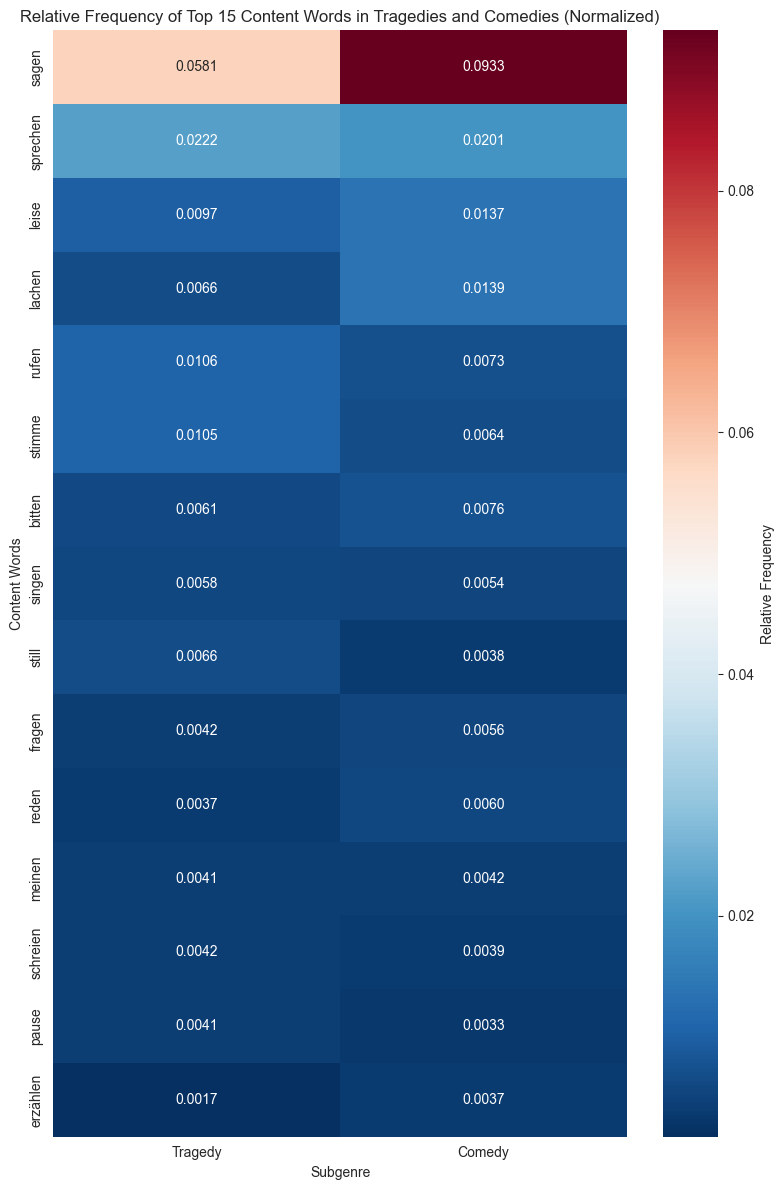

'\nplt.figure(figsize=(8, 12))\nsns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu", cbar_kws={\'label\': \'Relative Frequency\'})\nplt.title("Relative Frequency of Top 15 Content Words in Tragedies and Comedies (Normalized)")\nplt.ylabel("Content Words")\nplt.xlabel("Subgenre")\nplt.tight_layout()\n# Save plot\nplt.savefig(f\'/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250809_heatmap_com-trag.png\')\nplt.show()\n'

In [278]:
stopwords = {"so", "noch", "wieder", "ganz", "immer", "sehr", "hand", "jetzt", "auch", "nur", "schon", "da", "fast", "danke", "ja", "halb", "dann", "wie", "links", "plötzlich", "kurz", "rasch", "letzter", "herr", "rechts", "blick", "hören", "weiter", "tür", "mehr", "hin", "wort", "ton", "heftig", "schlagen"}

# Define a mapping for normalization (combine 'sag' into 'sagen')
normalization_map = {
    'sag': 'sagen', 'lachend': 'lachen', 'schreit': 'schreien'
    # Add other mappings if needed
}

# Function to normalize counts by mapping words to their normalized form
def normalize_counts(counts, norm_map):
    normalized = Counter()
    for word, count in counts.items():
        norm_word = norm_map.get(word, word)  # map if in dict, else original
        normalized[norm_word] += count
    return normalized

# Apply stopwords filtering first
filtered_tragedy_counts = filter_stopwords(genre_word_counts['tragedy'], stopwords)
filtered_comedy_counts = filter_stopwords(genre_word_counts['comedy'], stopwords)

# Normalize counts by merging 'sag' into 'sagen'
normalized_tragedy_counts = normalize_counts(filtered_tragedy_counts, normalization_map)
normalized_comedy_counts = normalize_counts(filtered_comedy_counts, normalization_map)

# Combine counts to find top 15 words overall after normalization
combined_counts = normalized_tragedy_counts + normalized_comedy_counts
top_15_words = [word for word, _ in combined_counts.most_common(15)]

# Calculate total words for normalization after normalization
total_tragedy_words = sum(normalized_tragedy_counts.values())
total_comedy_words = sum(normalized_comedy_counts.values())

# Prepare DataFrame for heatmap: rows=words, columns=['Tragedy', 'Comedy']
heatmap_data = pd.DataFrame(index=top_15_words, columns=['Tragedy', 'Comedy'])

for word in top_15_words:
    heatmap_data.loc[word, 'Tragedy'] = normalized_tragedy_counts.get(word, 0) / total_tragedy_words if total_tragedy_words > 0 else 0
    heatmap_data.loc[word, 'Comedy'] = normalized_comedy_counts.get(word, 0) / total_comedy_words if total_comedy_words > 0 else 0

heatmap_data = heatmap_data.astype(float)


# Plot heatmap
plt.figure(figsize=(8, 12))

vmin = heatmap_data.min().min()
vmax = heatmap_data.max().max()

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".4f",
    cmap="RdBu_r",  # Red to Blue reversed
    cbar_kws={'label': 'Relative Frequency'},
    vmin=vmin,
    vmax=vmax
)

plt.title("Relative Frequency of Top 15 Content Words in Tragedies and Comedies (Normalized)")
plt.ylabel("Content Words")
plt.xlabel("Subgenre")
plt.tight_layout()

plt.savefig('/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250809_heatmap_com-trag-red.png')
plt.show()


'''
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu", cbar_kws={'label': 'Relative Frequency'})
plt.title("Relative Frequency of Top 15 Content Words in Tragedies and Comedies (Normalized)")
plt.ylabel("Content Words")
plt.xlabel("Subgenre")
plt.tight_layout()
# Save plot
plt.savefig(f'/Users/sguhr/Library/Mobile Documents/com~apple~CloudDocs/20250701_Backup_MacBook/2024:25/CLS_Kurzstipendium/Sound_in_Drama/20250806_visualizations/20250809_heatmap_com-trag.png')
plt.show()
'''